In [1]:
#import statements
import pandas as pd
pd.set_option("display.max_columns", None)
import numpy as np
import datetime
!pip install geopy
from geopy.geocoders import Nominatim
from geopy.geocoders import ArcGIS
import time
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
!pip install folium
import folium
from folium import plugins
from datetime import datetime

In [2]:
#loads locations of police stations
police_locations = pd.read_csv("Police_Stations.csv")
police_locations.head(2)

,DISTRICT,DISTRICT NAME,ADDRESS,CITY,STATE,ZIP,WEBSITE,PHONE,FAX,TTY,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION
0,1,Central,1718 S State St,Chicago,IL,60616,http://home.chicagopolice.org/community/distri...,312-745-4290,312-745-3694,312-745-3693,1176569.052,1891771.704,41.858373,-87.627356,"(41.8583725929, -87.627356171)"
1,2,Wentworth,5101 S Wentworth Ave,Chicago,IL,60609,http://home.chicagopolice.org/community/distri...,312-747-8366,312-747-5396,312-747-6656,1175864.837,1871153.753,41.801811,-87.630560,"(41.8018110912, -87.6305601801)"


In [59]:
#loads parking data csv takes long time to run. Uncomment out it is needed to be ran.
parking_data = pd.read_csv("/Users/michael/Desktop/parking_tickets.csv")

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (6,9,19,21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Creates new zipcode as well as latitude and longitude lines

In [ ]:
#dec 16 2017
#built the new zipcode, latitude and longitude
zipcodes = []
latitudes = []
longitudes = []

#for ticket_address in single_day['violation_location']:
    print(ticket_address)
    address = '{}, Chicago, IL'.format(ticket_address)
    
    geolocator = ArcGIS()
    location = geolocator.geocode(address, timeout=1000)
    latitudes.append(location[1][0])
    longitudes.append(location[1][1])
    try:
        zipcode = int(location[0].split()[-1].rstrip(','))
    except:
        location = geolocator.reverse(location[1], timeout=1000)
        zipcode = int(location[0].split()[-2].rstrip(','))
        
    zipcodes.append(zipcode)



single_day.loc[:, 'new_zipcodes'] = pd.Series(zipcodes)
december_saturday.loc[:, 'latitudes'] = pd.Series(latitudes)
december_saturday.loc[:, 'longitudes'] = pd.Series(longitudes)



december_saturday.to_csv('december_saturday_Full_Dataset.csv')

In [ ]:
#dec 26 2017
#built the new zipcode, latitude and longitude
zipcodes = []
latitudes = []
longitudes = []

#for ticket_address in single_day['violation_location']:
    print(ticket_address)
    address = '{}, Chicago, IL'.format(ticket_address)
    
    geolocator = ArcGIS()
    location = geolocator.geocode(address, timeout=1000)
    latitudes.append(location[1][0])
    longitudes.append(location[1][1])
    try:
        zipcode = int(location[0].split()[-1].rstrip(','))
    except:
        location = geolocator.reverse(location[1], timeout=1000)
        zipcode = int(location[0].split()[-2].rstrip(','))
        
    zipcodes.append(zipcode)



#single_day.loc[:, 'new_zipcodes'] = pd.Series(zipcodes)
single_day.loc[:, 'latitudes'] = pd.Series(latitudes)
single_day.loc[:, 'longitudes'] = pd.Series(longitudes)



single_day.to_csv('Full_Dataset.csv')

In [ ]:
#june 9 2017   june_friday
zipcodes = []
latitudes = []
longitudes = []

#for ticket_address in june_friday['violation_location']:
    print(ticket_address)
    address = '{}, Chicago, IL'.format(ticket_address)
    
    geolocator = ArcGIS()
    location = geolocator.geocode(address, timeout=1000)
    latitudes.append(location[1][0])
    longitudes.append(location[1][1])
    try:
        zipcode = int(location[0].split()[-1].rstrip(','))
    except:
        location = geolocator.reverse(location[1], timeout=1000)
        zipcode = int(location[0].split()[-2].rstrip(','))
        
    zipcodes.append(zipcode)



june_friday.loc[:, 'new_zipcodes'] = pd.Series(zipcodes)
june_friday.loc[:, 'latitudes'] = pd.Series(latitudes)
june_friday.loc[:, 'longitudes'] = pd.Series(longitudes)



june_friday.to_csv('Full_Dataset_Friday_June2.csv')

In [ ]:
#june 10 2017 june_saturday
#zipcodes = []
latitudes = []
longitudes = []

#for ticket_address in june_saturday['violation_location']:
    print(ticket_address)
    address = '{}, Chicago, IL'.format(ticket_address)
    
    geolocator = ArcGIS()
    location = geolocator.geocode(address, timeout=1000)
    latitudes.append(location[1][0])
    longitudes.append(location[1][1])
    #try:
        zipcode = int(location[0].split()[-1].rstrip(','))
    except:
        location = geolocator.reverse(location[1], timeout=1000)
        zipcode = int(location[0].split()[-2].rstrip(','))
        
    zipcodes.append(zipcode)



#june_saturday.loc[:, 'new_zipcodes'] = pd.Series(zipcodes)
#june_saturday.loc[:, 'latitudes'] = pd.Series(latitudes)
#june_saturday.loc[:, 'longitudes'] = pd.Series(longitudes)



#june_saturday.to_csv('Full_Dataset_June_Saturday.csv')

# Creates seperate days of data frames

In [ ]:
#pulls data for Dec 26 th Tuesday
#import csv file below
#single_day = parking_data[(parking_data['issue_date'] >= "2017-12-26") & (parking_data['issue_date'] < "2017-12-27")]
single_day.reset_index(inplace=True, drop=True)

In [ ]:
#pulls data for Dec 16 weekend
#import file below
#december_saturday = parking_data[(parking_data['issue_date'] >= "2017-12-16") & (parking_data['issue_date'] < "2017-12-17")]
december_saturday.reset_index(inplace=True, drop=True)

In [ ]:
#june 9, 2017 Friday
#import file below
#june_friday = parking_data[(parking_data['issue_date'] >= "2017-06-09") & (parking_data['issue_date'] < "2017-06-10")]
june_friday.reset_index(inplace=True, drop=True)

In [ ]:
#june 10, 2017 Saturday
#import file below
#june_saturday=parking_data[(parking_data['issue_date'] >= "2017-06-10") & (parking_data['issue_date'] < "2017-06-11")]
june_saturday.reset_index(inplace=True, drop=True)

# creates data for winter and summer seasons

In [64]:
#nov 2017 to january 2018
winter = parking_data[(parking_data['issue_date'] >= "2017-1-01") & (parking_data['issue_date'] < "2018-1-31")]
single_day.reset_index(inplace=True, drop=True)

In [65]:
# june through august 2017
summer = parking_data[(parking_data['issue_date'] >= "2017-06-01") & (parking_data['issue_date'] < "2017-08-30")]
single_day.reset_index(inplace=True, drop=True)

# loads csv files of the different days

In [3]:
#upload dec 26, 2017 completed file of info included lat and long
 single_day= pd.read_csv("/Users/michael/Desktop/Springboard/capstone_1/Full_Dataset.csv")

In [4]:
#upload dec, 16 2017
december_saturday= pd.read_csv("/Users/michael/Desktop/Springboard/capstone_1/december_saturday_Full_Dataset.csv")

In [5]:
#upload June 9 csv
june_friday=pd.read_csv("/Users/michael/Desktop/Springboard/capstone_1/Full_Dataset_Friday_June2.csv")

In [6]:
#upload June 10 2017 csv
june_saturday=pd.read_csv("/Users/michael/Desktop/Springboard/capstone_1/Full_Dataset_June_Saturday.csv")

# created Datetime columns for csv file

In [ ]:
#creates Datetime column
#single_day['Datetime'] = pd.to_datetime(single_day['issue_date'])

In [10]:
#converts issue_date column to date time type for the single day data frame
single_day.issue_date = pd.to_datetime(single_day.issue_date)

In [11]:
#converts date time to datetime object
single_day['Datetime'] = pd.to_datetime(single_day['issue_date'])

In [12]:
#produces hour column
single_day['hour'] = single_day.issue_date.dt.hour

In [13]:
#converts issue_date column to date time type june_friday
june_friday.issue_date = pd.to_datetime(june_friday.issue_date)

In [14]:
#creates Datetime column june_friday
june_friday['Datetime'] = pd.to_datetime(june_friday['issue_date'])

In [15]:
#produces hour column june_friday
june_friday['hour'] = single_day.issue_date.dt.hour

In [16]:
#check to see hour and Datetime columns work correctly
single_day.head(3)

,Unnamed: 0,ticket_number,issue_date,violation_location,license_plate_number,license_plate_state,license_plate_type,zipcode,violation_code,violation_description,unit,unit_description,vehicle_make,fine_level1_amount,fine_level2_amount,current_amount_due,total_payments,ticket_queue,ticket_queue_date,notice_level,hearing_disposition,notice_number,officer,address,latitudes,longitudes,hour,Datetime
0,0,9192680820,2017-12-16,3473 N CLARK,64746252b5c6e9ba5f5aab9e2b3b2b902ec05eec0de158...,IL,PAS,60633.0,0964080B,NO STANDING/PARKING TIME RESTRICTED,502,DOF,NISS,100,200,0.0,100.0,Paid,2018-02-06 00:00:00,DETR,NaN,5207011090,1109,"3400 n clark, chicago, il",41.705378,-87.708747,0,2017-12-16
1,1,68894996,2017-12-16,2410 W CATALPA,afd361aee0cad191ecb238a7abebd592f8cdabf87196dc...,IL,PAS,60625.0,0964125B,"NO CITY STICKER VEHICLE UNDER/EQUAL TO 16,000 ...",20,CPD,NISS,200,400,0.0,200.0,Paid,2018-01-26 00:00:00,VIOL,NaN,5210312890,9014,"2400 w catalpa, chicago, il",41.886065,-87.620610,0,2017-12-16
2,2,9192716841,2017-12-16,23 W HUBBARD ST,f289d12483fab8c2390391f66c263ff955ddc460e265bf...,IL,PAS,607071735.0,0964080B,NO STANDING/PARKING TIME RESTRICTED,502,DOF,HOND,100,200,200.0,0.0,Notice,2017-12-21 00:00:00,FINL,NaN,5208926530,1627,"1 w hubbard st, chicago, il",41.906313,-87.733800,0,2017-12-16


In [ ]:
single_day.dtypes

In [117]:
#dropping columns here
#single_day.drop('Unnamed: 0', axis=1)
single_day.drop('license_plate_number', axis=1)
single_day.drop('vehicle_make', axis = 1)
single_day.drop('license_plate_number', axis=1)


,Unnamed: 0,ticket_number,issue_date,violation_location,license_plate_state,license_plate_type,zipcode,violation_code,violation_description,unit,unit_description,vehicle_make,fine_level1_amount,fine_level2_amount,current_amount_due,total_payments,ticket_queue,ticket_queue_date,notice_level,hearing_disposition,notice_number,officer,address,latitudes,longitudes,hour,Datetime
0,0,9192680820,2017-12-16 00:00:00,3473 N CLARK,IL,PAS,60633.0,0964080B,NO STANDING/PARKING TIME RESTRICTED,502,DOF,NISS,100,200,0.0,100.0,Paid,2018-02-06 00:00:00,DETR,NaN,5207011090,1109,"3400 n clark, chicago, il",41.705378,-87.708747,0,2017-12-16 00:00:00
1,1,68894996,2017-12-16 00:00:00,2410 W CATALPA,IL,PAS,60625.0,0964125B,"NO CITY STICKER VEHICLE UNDER/EQUAL TO 16,000 ...",20,CPD,NISS,200,400,0.0,200.0,Paid,2018-01-26 00:00:00,VIOL,NaN,5210312890,9014,"2400 w catalpa, chicago, il",41.886065,-87.620610,0,2017-12-16 00:00:00
2,2,9192716841,2017-12-16 00:00:00,23 W HUBBARD ST,IL,PAS,607071735.0,0964080B,NO STANDING/PARKING TIME RESTRICTED,502,DOF,HOND,100,200,200.0,0.0,Notice,2017-12-21 00:00:00,FINL,NaN,5208926530,1627,"1 w hubbard st, chicago, il",41.906313,-87.733800,0,2017-12-16 00:00:00
3,3,68747771,2017-12-16 00:01:00,3616 E 107TH ST,IL,PAS,606176701.0,0964150B,PARKING/STANDING PROHIBITED ANYTIME,4,CPD,GMC,75,150,0.0,75.0,Paid,2018-01-06 00:00:00,VIOL,NaN,5177215050,17916,"3600 e 107th st, chicago, il",41.773274,-87.666534,0,2017-12-16 00:01:00
4,4,68683501,2017-12-16 00:01:00,8435 S DREXEL,IL,PAS,604151666.0,0976160B,EXPIRED PLATE OR TEMPORARY REGISTRATION,6,CPD,NISS,60,120,146.4,0.0,Notice,2017-12-28 00:00:00,SEIZ,NaN,5190742630,15972,"8400 s drexel, chicago, il",41.886065,-87.620610,0,2017-12-16 00:01:00
5,5,9192700370,2017-12-16 00:02:00,1200 N PAULINA,IL,PAS,60622.0,0964100G,STOP SIGN OR TRAFFIC SIGNAL,502,DOF,CHEV,60,120,120.0,0.0,Notice,2017-12-21 00:00:00,FINL,NaN,5210023440,1565,"1200 n paulina, chicago, il",41.773274,-87.666534,0,2017-12-16 00:02:00
6,6,9192680821,2017-12-16 00:02:00,3463 N CLARK,IL,PAS,606252442.0,0964080B,NO STANDING/PARKING TIME RESTRICTED,502,DOF,INFI,100,200,0.0,100.0,Paid,2018-01-14 00:00:00,VIOL,NaN,5181121540,1109,"3400 n clark, chicago, il",41.658778,-87.559214,0,2017-12-16 00:02:00
7,7,68786468,2017-12-16 00:02:00,2611 N CENTRAL,IL,TMP,NaN,0976160B,EXPIRED PLATE OR TEMPORARY REGISTRATION,25,CPD,TOYT,60,120,60.0,0.0,Define,2018-01-02 00:00:00,NaN,NaN,0,11202,"2600 n central, chicago, il",41.947937,-87.744402,0,2017-12-16 00:02:00
8,8,69020784,2017-12-16 00:02:00,2600 W FULLERTON,IL,PAS,606083610.0,0976160B,EXPIRED PLATE OR TEMPORARY REGISTRATION,14,CPD,FORD,60,120,0.0,60.0,Paid,2018-01-29 00:00:00,DETR,NaN,5200724340,13954,"2600 w fullerton, chicago, il",41.886065,-87.620610,0,2017-12-16 00:02:00
9,9,9192713447,2017-12-16 00:03:00,228 S WABASH AV,IL,PAS,600761425.0,0964190B,EXPIRED METER CENTRAL BUSINESS DISTRICT,502,DOF,TOYT,65,130,0.0,65.0,Paid,2017-12-21 00:00:00,NaN,NaN,5210102660,1639,"200 s wabash av, chicago, il",41.838843,-87.712298,0,2017-12-16 00:03:00


In [118]:
# total tickets issued in summer months of 2017
ticket_issuer = list,summer['officer'].value_counts().keys().tolist()
counts = summer['officer'].value_counts().tolist()
print(summer['officer'].value_counts().head(2))

716    7229
638    5860
Name: officer, dtype: int64


In [119]:
# total number of officers who issued tickets 2007 to 2018
ticket_issuer = list,parking_data['officer'].value_counts().keys().tolist()
counts = parking_data['officer'].value_counts().tolist()
print(parking_data['officer'].value_counts().head(2))

716    189826
638    176253
Name: officer, dtype: int64


In [68]:
# This is the number of states/countries/providences 
#that are represented
mask = parking_data.officer.nunique()
print('This many unique states were issued tickets Dec 26 2017 was', mask)

This many unique states were issued tickets Dec 26 2017 was 31483


In [121]:
#total tickets issuend in winter months
ticket_issuer = list,winter['officer'].value_counts().keys().tolist()
counts = winter['officer'].value_counts().tolist()
print(winter['officer'].value_counts().head(2))

      

IndexError: invalid index to scalar variable.

In [122]:
#this is a break down of who issued the tickets

ticket_issuer = list,single_day['officer'].value_counts().keys().tolist()
counts = single_day['officer'].value_counts().tolist()
print(single_day['officer'].value_counts().head())

1630    128
820      87
813      83
808      77
1623     76
Name: officer, dtype: int64


# Who issued the most tickets

In [75]:
#total for officer 716
ticket_issuer = list,parking_data['officer'].value_counts().keys().tolist()
counts = parking_data['officer'].value_counts().tolist()
print(parking_data['officer'].value_counts().head())

716    189826
638    176253
287    159961
728    152410
641    137730
Name: officer, dtype: int64


In [ ]:
len(ticket_issuer)

Text(0, 0.5, 'Number of officers who issued tickets')

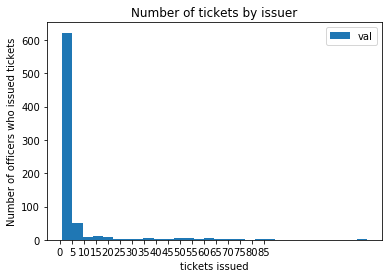

In [26]:
#add tick labels
df = pd.DataFrame({'lab':counts, 'val':counts})
ax = df.plot.hist(x='lab', y='val',bins = 30,  rot=0, title='Number of tickets by issuer')
ax.set_xlabel('tickets issued')
#plt.yticks(range(0, 10, 250), fontsize=8)
plt.xticks(range(0,90, 5))
ax.set_ylabel("Number of officers who issued tickets")

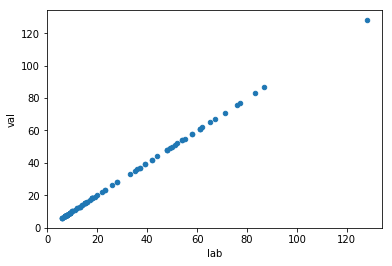

In [27]:
#change into a histogram later
df = pd.DataFrame({'lab':counts[0:100], 'val':counts[0:100]})
ax = df.plot.scatter(x='lab', y='val', rot=0)

In [28]:
single_day.shape

(3940, 28)

# What happened to the tickets issued these days

In [129]:
# Break down of tickets paid/unpaid/dismissed for december 26
ticket_status = single_day['ticket_queue'].value_counts().keys().tolist()
counts = single_day['ticket_queue'].value_counts().tolist()
print(single_day['ticket_queue'].value_counts())


Paid           2291
Notice          953
Define          387
Dismissed       267
Bankruptcy       21
Court            17
Hearing Req       4
Name: ticket_queue, dtype: int64


In [30]:
# Break down of tickets paid/unpaid/dismissed for June 9
ticket_status = june_friday['ticket_queue'].value_counts().keys().tolist()
counts = june_friday['ticket_queue'].value_counts().tolist()
print(june_friday['ticket_queue'].value_counts())

Paid          5058
Notice        1600
Define         701
Dismissed      613
Bankruptcy      80
Name: ticket_queue, dtype: int64


In [31]:
# Break down of tickets paid/unpaid/dismissed for June 10
ticket_status = june_saturday['ticket_queue'].value_counts().keys().tolist()
counts = june_saturday['ticket_queue'].value_counts().tolist()
print(june_saturday['ticket_queue'].value_counts())

Paid           2781
Notice         1019
Dismissed       427
Define          409
Bankruptcy       49
Hearing Req       1
Name: ticket_queue, dtype: int64


In [32]:
# This is the number of states/countries/providences 
#that are represented
mask = single_day.license_plate_state.nunique()
print('This many unique states were issued tickets Dec 26 2017 was', mask)

This many unique states were issued tickets Dec 26 2017 was 37


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3940 entries, 0 to 3939
Data columns (total 28 columns):
Unnamed: 0               3940 non-null int64
ticket_number            3940 non-null int64
issue_date               3940 non-null datetime64[ns]
violation_location       3940 non-null object
license_plate_number     3940 non-null object
license_plate_state      3940 non-null object
license_plate_type       3896 non-null object
zipcode                  3249 non-null float64
violation_code           3940 non-null object
violation_description    3940 non-null object
unit                     3940 non-null int64
unit_description         3940 non-null object
vehicle_make             3940 non-null object
fine_level1_amount       3940 non-null int64
fine_level2_amount       3940 non-null int64
current_amount_due       3940 non-null float64
total_payments           3940 non-null float64
ticket_queue             3940 non-null object
ticket_queue_date        3940 non-null object
notice_level 

In [33]:
# This will tell us the number of officers who issued tickets dec 26

single_day.officer.nunique()
   

739

In [34]:
# This will tell us the number of officers who issued tickets june 9

june_friday.officer.nunique()

1036

In [35]:
# This will tell us the number of officers who issued tickets june 10

june_saturday.officer.nunique()


917

In [36]:
#used this while testing theory to understand what was happening
single_day['violation_location'].head()

0       3473 N CLARK
1     2410 W CATALPA
2    23 W HUBBARD ST
3    3616 E 107TH ST
4      8435 S DREXEL
Name: violation_location, dtype: object

In [37]:
#this tallies tickets by violation type on Dec 26
single_day.violation_description.value_counts().head()


EXP. METER NON-CENTRAL BUSINESS DISTRICT              684
EXPIRED PLATE OR TEMPORARY REGISTRATION               682
RESIDENTIAL PERMIT PARKING                            490
EXPIRED METER CENTRAL BUSINESS DISTRICT               381
NO CITY STICKER VEHICLE UNDER/EQUAL TO 16,000 LBS.    333
Name: violation_description, dtype: int64

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54],
 <a list of 55 Text xticklabel objects>)

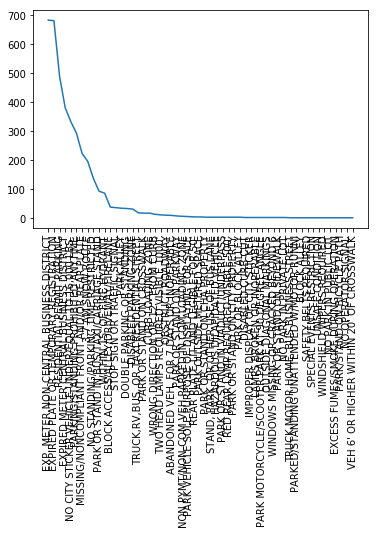

In [38]:
#want to be able to compare the top 2 values
plt.plot(single_day.violation_description.value_counts())

plt.xticks(rotation=90)

In [ ]:
# This will tell us the number of officers who issued tickets

abc = single_day.officer.nunique()
print(abc, 'This, many unique officers issued tickets')

In [ ]:
# this will tell us how many states were issued tickets
state = single_day['license_plate_state'].value_counts().keys().tolist()
counts = single_day['license_plate_state'].value_counts().tolist()
print(single_day['license_plate_state'].value_counts().head(2))

In [ ]:
#this shows top 20 zip codes of residents who recieved parking tickets
uniqueZip = single_day['new_zipcodes'].value_counts().keys().tolist()
counts = single_day['new_zipcodes'].value_counts().tolist()
#print(single_day['new_zipcodes'].value_counts())
single_day.new_zipcodes

# Heat maps below

In [76]:
#tells folium to focus on lat/long of Chicago
def generateBaseMap (default_location=[41.895, -87.62], default_zoom_start=12):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

In [77]:
police_locations.head(2)

,DISTRICT,DISTRICT NAME,ADDRESS,CITY,STATE,ZIP,WEBSITE,PHONE,FAX,TTY,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION
0,1,Central,1718 S State St,Chicago,IL,60616,http://home.chicagopolice.org/community/distri...,312-745-4290,312-745-3694,312-745-3693,1176569.052,1891771.704,41.858373,-87.627356,"(41.8583725929, -87.627356171)"
1,2,Wentworth,5101 S Wentworth Ave,Chicago,IL,60609,http://home.chicagopolice.org/community/distri...,312-747-8366,312-747-5396,312-747-6656,1175864.837,1871153.753,41.801811,-87.630560,"(41.8018110912, -87.6305601801)"


In [123]:
# maps locations of police stations in chicago
m = folium.Map([41.8781, -87.6298], zoom_start=11)
m

# mark each station as a point
for index, row in police_locations.iterrows():
    folium.CircleMarker([row['LATITUDE'], row['LONGITUDE']],
                        radius=5,
                        popup=row['DISTRICT NAME'],
                        fill_color="#3db7e4", # divvy color
                       ).add_to(m)
# plot heatmap
m.add_children(plugins.HeatMap(stationArr, radius=15))
m

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: Method `add_children` is deprecated. Please use `add_child` instead.
  del sys.path[0]


In [124]:
# dec 26 heat map friday
#set equal to 
#tells folium to focus on lat/long of Chicago

#this data we will see what area the top ticket issuer issued tickets in
december = single_day


m = folium.Map([41.8781, -87.6298], zoom_start=11)
m

# shows officer 759 area of tickets being issued
stationArr = december[['latitudes', 'longitudes']].as_matrix()

# mark each station as a point
for index, row in police_locations.iterrows():
    folium.CircleMarker([row['LATITUDE'], row['LONGITUDE']],
                        radius=5,
                        popup=row['DISTRICT NAME'],
                        fill_color="#3db7e4", # divvy color
                       ).add_to(m)

# plot heatmap
m.add_children(plugins.HeatMap(stationArr, radius=15))
m

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  del sys.path[0]


ValueError: data cannot contain NaNs, got:
[[41.70537804662706, -87.70874717724601], [41.886065381597575, -87.6206095421314], [41.9063127171793, -87.73379990316789], [41.77327427699231, -87.66653366232929], [41.886065381597575, -87.6206095421314], [41.77327427699231, -87.66653366232929], [41.65877820735247, -87.55921379098575], [41.947936513994044, -87.7444017485429], [41.886065381597575, -87.6206095421314], [41.83884314101315, -87.71229801736318], [41.97036094866976, -87.74172081031782], [41.88611694754457, -87.62062658961877], [41.87476614468264, -87.62052519695435], [41.84062216763807, -87.71219708961875], [41.96982972269586, -87.72570135387285], [41.87671148845882, -87.74889258090485], [41.71448308383528, -87.61979778425743], [41.85336654674261, -87.73230172009347], [41.925832994171635, -87.63915791701768], [41.85336548845882, -87.73104141618097], [41.853374488458826, -87.73071291618095], [41.853374488458826, -87.73049241618098], [41.994520469162055, -87.68247354746296], [41.795631, -87.61768986057614], [41.87305169518049, -87.67596322752544], [41.87301468040081, -87.67601244035751], [42.00775793824978, -87.67874533977106], [41.85343747489747, -87.7298436931733], [41.8734377259326, -87.67570078407734], [41.8734377259326, -87.67570078407734], [41.8663874787926, -87.71074200000001], [41.666975497085815, -87.62229079381363], [41.87297766562112, -87.6760616531896], [41.87305169518049, -87.67596322752544], [41.872360425860904, -87.67681519138155], [41.85339151399404, -87.72871016472385], [41.74858241135484, -87.66511525030859], [41.85339151399404, -87.72871016472385], [41.88327224562872, -87.77333742148973], [41.74497945045877, -87.64746475725681], [41.87441752535017, -87.64530482725948], [41.85339953952927, -87.72817113918865], [42.013749470136936, -87.67259147155058], [41.676891371293394, -87.62269532435373], [41.86865338435437, -87.67010337714426], [41.911785115182646, -87.72879512236733], [41.677155, -87.622689801027], [41.853462525967906, -87.72663166763806], [41.86860817323278, -87.6702166961828], [41.80022287982317, -87.58903613946951], [41.91029127096353, -87.69731724145961], [41.853526639568685, -87.72562993912534], [41.86860817323278, -87.6702166961828], [41.91537065998104, -87.73023290175827], [41.85258448600598, -87.72591086081135], [41.845238085938654, -87.72495260571561], [41.91537065998104, -87.73023290175827], [41.85258448600598, -87.72613136081135], [41.85258448600598, -87.72613136081135], [41.85258448600598, -87.72613136081135], [41.90035022227741, -87.64180648053268], [41.91537065998104, -87.73023290175827], [41.870933947544586, -87.6848756406892], [41.77135794754457, -87.67250418786449], [41.7169375226497, -87.65728102553524], [41.91537065998104, -87.73023290175827], [41.87049294754459, -87.68486311515396], [41.85257646047075, -87.7270232514571], [41.96149132944774, -87.65232844255291], [41.86970327012946, -87.68483187796853], [41.83326277322956, -87.73405144381162], [41.716936464365894, -87.65612422162269], [41.852567460470745, -87.72770186081135], [41.69864572605496, -87.65366222346859], [41.88708023036528, -87.6245146734378], [41.88708023036528, -87.6245146734378], [41.88713302208845, -87.62449064588823], [41.903928199001676, -87.72507714790254], [41.904108199001676, -87.72507714790254], [41.888416763248266, -87.62505961837587], [41.888416763248266, -87.62505961837587], [41.88775922341171, -87.62575583011156], [41.800212000000016, -87.58905512958071], [41.88223776963472, -87.62784976496019], [41.879340441466105, -87.76302742711533], [41.70622648600596, -87.62706033527613], [41.80477528282072, -87.74181370618635], [41.80477528282072, -87.74181370618635], [41.93073677148932, -87.7673700223489], [41.89666347615947, -87.75725216647112], [41.89666347615947, -87.75725216647112], [41.87936151875454, -87.75838286081135], [41.87936151875454, -87.75838286081135], [41.93045899417164, -87.76865893591646], [41.896786773270506, -87.75998604548651], [41.77766557507647, -87.676356801027], [41.87835751399405, -87.76115172300769], [41.87830840428201, -87.76082020265831], [41.705383454671725, -87.61454077014591], [41.896675499567316, -87.76049047446476], [41.77871145045876, -87.67632723893496], [41.85774003136362, -87.71025414790256], [41.92555404662704, -87.76851680102699], [41.87744648124545, -87.76002141618095], [41.89586978739611, -87.76071228282784], [41.780428513994025, -87.60167064856638], [41.780428513994025, -87.60167064856638], [41.858008994171634, -87.71033885209744], [41.895747525102536, -87.76381105536963], [41.89584660946999, -87.76384964638996], [41.857873994171634, -87.71033885209744], [41.87775850318828, -87.74525038572874], [41.92692336663973, -87.76968564790256], [41.877675511541185, -87.74769077699231], [41.92709436663975, -87.76968458961876], [41.84257485782165, -87.70755911217356], [41.77429132944775, -87.60339732656222], [41.749307633360274, -87.64887679381363], [42.01469061226845, -87.68754050530876], [41.8624714773503, -87.7069219715506], [42.014843612268464, -87.68753697977354], [41.747470994171636, -87.6512773265622], [41.920794534277796, -87.68746465511593], [41.920366198288434, -87.75499046601473], [41.920366198288434, -87.75495792493895], [41.88897077216657, -87.61399200000002], [41.78579548066854, -87.60773297155058], [41.89500547674605, -87.75427830215655], [41.91477303136361, -87.73622708961877], [41.86099146577588, -87.70583449640229], [41.895865649583506, -87.754425232408], [42.018408, -87.68900099420027], [41.896465658895494, -87.75442684488407], [41.86125687142089, -87.70421882356806], [41.90360106216152, -87.72883323856631], [42.01686894754457, -87.68886995423831], [41.8970342828207, -87.75436658961875], [41.90072403136361, -87.67469612236735], [41.77482266472387, -87.6762793265622], [41.78247345045878, -87.613205198973], [41.900102696087494, -87.75444406408354], [41.89952632944775, -87.75451093591646], [41.89952632944775, -87.75451093591646], [41.96968779477977, -87.64571166795133], [41.9027195902501, -87.72866997618094], [41.84830967638064, -87.63998465569284], [41.78121187402199, -87.61316239363299], [41.900102696087494, -87.75444406408354], [41.84896793868197, -87.63907543271645], [41.905908754371296, -87.76449511515398], [41.905908754371296, -87.76449511515398], [41.84939176371499, -87.638526979136], [41.85419667085666, -87.66616268003017], [41.90162386372555, -87.75448456408354], [41.75145080037653, -87.58140281346462], [41.89964195256649, -87.75333890909424], [41.85130985247478, -87.63191886640156], [41.80088205412886, -87.585960480957], [41.76872086372555, -87.6712156517977], [42.002715902209886, -87.67216058102514], [41.93517485393291, -87.75359873392809], [41.8739159730176, -87.62771638142452], [41.89377368333421, -87.65154470578234], [42.00277089555033, -87.67230333021332], [42.00276230238217, -87.6721763570837], [41.934903275775056, -87.75160290510951], [42.002904447400354, -87.67232356483333], [41.88294318845506, -87.6567785144312], [41.91422411518264, -87.76432305687017], [41.90118336773625, -87.66317785250145], [42.00666211071528, -87.67347114762411], [41.82974314902774, -87.67862629251556], [41.90244726559537, -87.66513014490145], [41.85409648600597, -87.67045277699232], [41.90264323284678, -87.66541665211483], [41.845648032034184, -87.6177062265977], [41.88406466832814, -87.65211849568702], [40.608371117664134, -89.46582619429846], [41.88406466832814, -87.65211849568702], [41.909810792688454, -87.67648650830988], [41.74576124562873, -87.6439378265622], [41.88119540631726, -87.76327778482641], [41.73590651009891, -87.65356097155058], [41.886536529863065, -87.69800177699233], [41.881060637696436, -87.76327430692652], [41.80872639665592, -87.69050665325855], [41.881060637696436, -87.76327430692652], [41.90460973947614, -87.72066174214184], [41.93463084375891, -87.71646415762609], [41.88652549711448, -87.69993308381903], [41.97584049567218, -87.69384000000001], [41.809407332465376, -87.6906573548623], [41.809407332465376, -87.6906573548623], [41.80869692693739, -87.69050353626909], [41.948668978648364, -87.73950652565078], [41.75313160281173, -87.72688941035793], [41.96168772551785, -87.7553562646144], [41.81175045045875, -87.69672468065114], [41.96160973273121, -87.75528627572291], [41.81099265889549, -87.69678035209743], [41.81099265889549, -87.69678035209743], [41.87893239521128, -87.70611656928206], [41.746058612268456, -87.66573670618637], [41.90760098808994, -87.7338867976239], [41.855542910352604, -87.73255838095088], [41.97108608574678, -87.76368639557451], [41.85954961809682, -87.73714517343778], [41.85954961809682, -87.73714517343778], [41.952332403132594, -87.76501816444754], [41.80697949708582, -87.65889688484602], [41.74926224562873, -87.64766081934886], [41.741721115182635, -87.66438467343778], [41.74486642323016, -87.65904034846962], [41.866449504327846, -87.70484300291417], [41.96909591035259, -87.76754895034321], [41.767793884817365, -87.56822028660027], [41.75028548124546, -87.66521147155058], [41.83651162727106, -87.64261752892011], [41.83628152596792, -87.64273294463038], [41.834601031363604, -87.64491661515396], [41.751651363237656, -87.66461915635284], [41.8939014532574, -87.69074336081135], [41.751622038190796, -87.5682650554753], [41.7483999412268, -87.66089794934652], [41.89231641658765, -87.66864986043329], [41.91699586372556, -87.6763540712969], [41.751687518754565, -87.57288402844941], [41.76560943989972, -87.67593405140705], [41.88305754674261, -87.68040338773156], [41.720607335276135, -87.53642416622442], [41.7869141480579, -87.74122893437065], [41.83448502929385, -87.6452079780176], [41.98524336499496, -87.69864626850953], [41.98401146183993, -87.69649505626995], [41.8818834865829, -87.64046019317327], [41.79302437474644, -87.74821086183371], [41.736419488458814, -87.61864122300769], [41.87997899999999, -87.63701832209014], [41.996584046746285, -87.68245246954883], [41.8818834865829, -87.64046019317327], [41.936135082885286, -87.81306107277004], [41.79246303136361, -87.62396465843416], [41.766013173466426, -87.63097518065113], [41.8818834865829, -87.64046019317327], [41.731496580904825, -87.6423198593108], [41.8818834865829, -87.64046019317327], [41.76666028282071, -87.63099318065113], [41.731128282820684, -87.64099473172159], [41.995350115182646, -87.70072658961875], [41.79302437474644, -87.74821086183371], [41.89337667137925, -87.61753694005631], [41.89337667137925, -87.61753694005631], [41.99497298749869, -87.7018984650609], [41.96044160349044, -87.76312399343814], [41.87466405167197, -87.64100369576168], [41.96044307432592, -87.76301073910645], [41.73323299417164, -87.63504926827841], [41.996025746322275, -87.68744321729082], [41.909214813598155, -87.67994838654276], [41.96044454516139, -87.76289748477474], [41.89170303558798, -87.62153728879471], [41.90842738190318, -87.67986783767071], [41.97857069166022, -87.88026450548641], [41.72180331767496, -87.62474592314551], [41.87997899999999, -87.63701832209014], [41.960521682249706, -87.75821246257175], [41.85490853231589, -87.6736122485429], [41.80106551399405, -87.68738297155058], [41.9027195902501, -87.72866997618094], [41.9656754074384, -87.71574785209744], [41.73122599417161, -87.63620929381365], [41.99590551788919, -87.68702182944773], [41.860157131301705, -87.62311242638712], [41.96059254674262, -87.75628166472387], [41.9606025212074, -87.75602099999999], [41.85493650678068, -87.67219097155058], [41.87997899999999, -87.63701832209014], [41.7878187799065, -87.69360618065113], [41.960601546742616, -87.75512197446476], [41.87997899999999, -87.63701832209014], [41.78837703136361, -87.69361615511593], [41.79200396863641, -87.62244881213549], [41.82174152120741, -87.70221022009348], [41.92164548124545, -87.69965400000001], [41.94591053952925, -87.76080930391251], [41.85493650678068, -87.67199208090484], [41.93219626052759, -87.72322614079138], [41.96059198359895, -87.75059781866702], [41.82163827516646, -87.70381444312369], [41.94590251399404, -87.76250052844941], [41.79579328282071, -87.69382570618635], [41.76498934569877, -87.56643390221312], [41.922094783045274, -87.70216758442034], [41.96060514998845, -87.74867664998845], [41.70674607799066, -87.60402881934885], [41.75699341326677, -87.56513735209744], [41.94591053952925, -87.76080930391251], [41.78838541326678, -87.6949093265622], [41.932067843108996, -87.6552018133374], [41.800248115182654, -87.69394720618637], [41.923189048696656, -87.70128219785542], [41.884259032481474, -87.68168080669258], [41.85497648845882, -87.66871205245542], [41.80032011518264, -87.69394614790255], [41.884259032481474, -87.68168080669258], [41.94593619085715, -87.75573817234695], [41.9240709649902, -87.76969437275986], [41.706494488458816, -87.60561355536963], [41.87307020257035, -87.67593862110937], [41.9240709649902, -87.76969437275986], [41.89874826644573, -87.69179802535582], [41.73148858673324, -87.6397966734378], [41.87307020257035, -87.67593862110937], [41.92404426942415, -87.76969368825816], [41.9240709649902, -87.76969437275986], [41.70643467694593, -87.60619701322153], [41.95228648600596, -87.76484019317327], [41.93127936663973, -87.65572613347584], [41.88439221510775, -87.62439327365412], [41.94606548845879, -87.74931052553522], [41.940818488458795, -87.73231972009349], [41.871608947544594, -87.62586612568553], [41.79041103136362, -87.69367368065113], [41.706584163043864, -87.60646956754906], [41.891734499567306, -87.62212308090484], [41.94080948845883, -87.73252222009349], [41.931836633360255, -87.65581791038124], [41.85497113859053, -87.66616855440475], [41.9319704074384, -87.65581685209743], [41.94601616751145, -87.74745640050686], [41.940790513994045, -87.73350258090484], [41.93211759256161, -87.6557556629062], [41.93211759256161, -87.6557556629062], [41.77450811518264, -87.60211668065115], [41.945822488458816, -87.77010213918865], [41.7903332006036, -87.60376444514885], [41.925744, -87.7024113592721], [41.79436200000001, -87.69379509683209], [41.940791488458814, -87.73383108090485], [41.7903332006036, -87.60376444514885], [41.79436200000001, -87.69379509683209], [41.79436200000001, -87.69379509683209], [41.88212346047076, -87.68470427699232], [41.79614028627228, -87.69381623305081], [41.8818834865829, -87.64046019317327], [41.944106460470756, -87.76544302553522], [41.801490546742635, -87.6499518039125], [41.77512611243839, -87.59709893685002], [41.92029126094961, -87.71517958315356], [41.801490546742635, -87.6499518039125], [41.94577651399405, -87.77286063918865], [41.8866305342778, -87.74793987763266], [41.94577651399405, -87.77286063918865], [41.8787375115412, -87.73739027699231], [41.92497017706329, -87.75570227116842], [41.8818834865829, -87.64046019317327], [41.72244311518264, -87.64074519897301], [41.92503151399404, -87.75548147155058], [41.92872018808728, -87.70416072827835], [41.8105442828207, -87.69424518065115], [41.824637161809676, -87.66783838484602], [41.824566052455424, -87.6678393593108], [41.925734863725545, -87.75980310794061], [41.87781178525031, -87.73091181689207], [41.87781178525031, -87.73091181689207], [41.79415021307972, -87.6596959990697], [41.82424116180968, -87.66782683377558], [41.85596551399404, -87.66503163918863], [41.88284220483004, -87.63240319507786], [41.75290761226845, -87.56620668065113], [41.88248524366783, -87.63250075633219], [41.754959044242746, -87.56621513065014], [41.816410239800355, -87.68717832656222], [41.82320946047074, -87.66809002553522], [41.93067797864837, -87.70804648568884], [41.79218512519418, -87.65984061621216], [41.79218512519418, -87.65984061621216], [41.88248524366783, -87.63280813347038], [41.919506884817366, -87.77559891038123], [41.922647214265105, -87.7756978265622], [41.92513989428372, -87.7553596552812], [41.75564869186596, -87.56623206524492], [41.8826677599067, -87.63378825063386], [41.9897056588955, -87.69819891038124], [41.791509282820705, -87.66086418065113], [41.857503265055854, -87.66380384178709], [41.9897056588955, -87.69819891038124], [41.791509282820705, -87.66086418065113], [41.891734499567306, -87.62212308090484], [41.791509282820705, -87.66086418065113], [41.97857069166022, -87.88026450548641], [41.890430177983816, -87.62808185812933], [41.75667011518264, -87.56627664790254], [41.89171732789252, -87.62856171830771], [41.990439553955994, -87.69373230391251], [41.903482736777505, -87.6313978581327], [41.75667011518264, -87.56627664790254], [41.82329552207276, -87.67239341909516], [41.769954115182635, -87.62494669507788], [41.846321647779384, -87.71375406334982], [41.789285863725546, -87.65958715511593], [41.893954344258205, -87.68045133043556], [41.99043047013695, -87.69508255536961], [41.75690411518264, -87.56628670618635], [41.769954115182635, -87.62494669507788], [41.75763252844942, -87.56629464790255], [41.932847065853736, -87.65393514306524], [41.92601548600598, -87.7543014446304], [41.84655659285008, -87.695187688067], [41.89321457723586, -87.62790694596256], [41.90385391623195, -87.63051065432256], [41.93279644774385, -87.65381878003572], [41.925918242421815, -87.75382883763798], [41.89321457723586, -87.62790694596256], [41.847197733162176, -87.69465976731203], [41.84725698923046, -87.69466141331392], [41.925509161809686, -87.77580688484602], [41.92701271717931, -87.77586088484603], [41.90587678415969, -87.63012028415967], [41.83027946726341, -87.67816890188429], [41.93227748845882, -87.75734302553522], [41.8818834865829, -87.64046019317327], [41.8818834865829, -87.64046019317327], [41.932333486005966, -87.757272], [41.78460611518264, -87.65946468065115], [41.78450711518264, -87.65946468065115], [41.89324050678066, -87.62874258090484], [41.78489273901759, -87.65990736338892], [41.78460611518264, -87.65946468065115], [41.773500282820685, -87.62508468065116], [41.78467699417163, -87.6595393265622], [41.78460611518264, -87.65946468065115], [41.83027946726341, -87.67816890188429], [41.76495148600597, -87.6629345867332], [41.89324050678066, -87.62874258090484], [41.93349151399403, -87.65468147155056], [41.891593232764905, -87.62763573276493], [41.92686751399404, -87.75398313918865], [41.89324050678066, -87.62874258090484], [41.78441711518264, -87.65945470618637], [41.858203331397064, -87.65879514004975], [41.933925, -87.70751885919005], [41.9040176460186, -87.62958254992209], [41.957594413266776, -87.7228369287031], [41.9282547171793, -87.77589688484602], [41.7457924565756, -87.60715241909516], [41.830341517889174, -87.6773205], [41.78046589189004, -87.65933680660059], [41.92692448600596, -87.7540502514571], [41.85864045045878, -87.65882611515396], [41.87315594407056, -87.7204124842362], [41.859499271161255, -87.66877072883875], [41.891593232764905, -87.62763573276493], [41.88706380429839, -87.72090829988954], [41.90403137521071, -87.62993913077077], [41.9335849743512, -87.65470368081861], [41.78038486372553, -87.65935570618635], [41.9149988345124, -87.7468051537318], [41.828885245628726, -87.67650088484602], [41.85905534110452, -87.65884411515398], [41.78038486372553, -87.65935570618635], [41.97857069166022, -87.88026450548641], [41.87705948124545, -87.7236702485429], [41.93247588481736, -87.77605994312981], [41.891593232764905, -87.62763573276493], [41.771420717179296, -87.73966879381365], [41.821684323619365, -87.69465830102699], [41.7809898520696, -87.59302015514167], [41.760863968636386, -87.63459781603062], [41.77824695910207, -87.65926353110564], [41.821684323619365, -87.69465830102699], [41.859486523949904, -87.66988882576273], [41.92691548600598, -87.75456236081135], [41.85945945045876, -87.65885311515396], [41.904241288916246, -87.63005951317439], [41.876775550193145, -87.6287750719084], [41.777964450458775, -87.65926620286814], [41.87968446047075, -87.73414127699232], [41.898474977374335, -87.69917391027063], [41.821740785734896, -87.69458523172159], [41.87683588241281, -87.62864127085507], [41.8273385342778, -87.67636367343779], [41.85945945045876, -87.65885311515396], [41.8829217171793, -87.64122834877922], [41.933396794566114, -87.65821846873257], [41.89191208230788, -87.62664136386988], [41.87307020257035, -87.67593862110937], [41.87967546047074, -87.73516277699233], [41.821740785734896, -87.69458523172159], [41.965793497085826, -87.72436041759461], [41.746469721697224, -87.55756756423506], [41.887187245628716, -87.72100841427637], [41.93345655063775, -87.73649932944772], [41.772042372495335, -87.65804406131306], [41.92684951399403, -87.75533313918865], [41.772042372495335, -87.65804406131306], [41.89299341909515, -87.62669462236734], [41.76908986372555, -87.57633414790257], [41.857712488458816, -87.67029116472388], [41.89321794419152, -87.62739180174633], [41.875311591087375, -87.62874325369364], [41.91320941084629, -87.72881805199722], [41.9288358116854, -87.67110504220975], [41.828454, -87.67395714790257], [41.927003465722215, -87.75628835209743], [41.828454, -87.67395714790257], [41.77036794754457, -87.57636564790256], [41.77135855536964, -87.65432735209744], [41.87521863918866, -87.62971687373751], [41.77122341909515, -87.6542551734378], [41.77036794754457, -87.57636564790256], [41.77168241909516, -87.65426417343778], [41.89893861478796, -87.67965470212229], [41.828445000000016, -87.67402887041929], [41.828487001907924, -87.67376094256065], [41.87307020257035, -87.67593862110937], [41.91064839312293, -87.62880368508057], [41.89919240743839, -87.67963784098895], [41.875311591087375, -87.62874325369364], [41.771150444630386, -87.6542551734378], [41.85777051875454, -87.66977336081135], [41.92925361226844, -87.67069659683209], [41.92771253952926, -87.75806366472388], [41.828769115182645, -87.67396614790256], [41.89324148124546, -87.62882358090485], [41.76063871717929, -87.6321388265622], [41.828769115182645, -87.67396614790256], [41.817600618096826, -87.69445464790256], [41.893474971137884, -87.62544785959301], [41.92770451399403, -87.75865194503443], [41.777196994541434, -87.65923307771715], [41.881695771017775, -87.63387521358803], [41.93937751399403, -87.69447972300767], [41.974375980802996, -87.6540665795454], [41.81625919900168, -87.69441618065113], [41.89850966743904, -87.67989376228306], [41.96922303136361, -87.72438308961875], [41.8976453665024, -87.62388542016006], [41.77832361226845, -87.65442617343778], [41.778063502914186, -87.65441619897301], [41.829451910352596, -87.67405887763266], [41.778063502914186, -87.65441619897301], [41.87983624482056, -87.72472778421341], [41.90952340661632, -87.72534455890289], [41.96982603136362, -87.72439553133495], [41.93874242414425, -87.69286897835529], [41.933629591470215, -87.7192924154802], [41.93088249708581, -87.6707899287031], [41.94447949788609, -87.72658438003575], [41.79200396863641, -87.62244881213549], [41.844323655285685, -87.62049304046911], [41.93013148514061, -87.71186216472387], [41.758675120315296, -87.63212136094593], [41.80114685291803, -87.72823014590112], [41.909509271115866, -87.72534374339325], [41.97085124562872, -87.72450943591646], [41.928560240425156, -87.75932630414572], [41.883957316538975, -87.65447111616814], [41.761584586733214, -87.56637664400742], [41.90076054674262, -87.62639358090483], [41.93013148514061, -87.71186216472387], [41.93060650618564, -87.77601462604444], [41.7675780627272, -87.65659376447017], [41.82910398138967, -87.6796751277917], [41.8922425411649, -87.68179686929176], [41.857410443091204, -87.65162247190989], [41.9089219103526, -87.72530691038124], [41.8922425411649, -87.68179686929176], [41.928680460470744, -87.75858052553522], [41.96557314401839, -87.72925085598162], [41.86699051399404, -87.72937247155058], [41.82910398138967, -87.6796751277917], [41.92922218766681, -87.71292], [41.85748372624607, -87.64958933559696], [41.973506161809695, -87.7245704031679], [41.89613948124545, -87.66083280391251], [41.7045959686364, -87.61494776827841], [41.84439473522125, -87.62049497103527], [41.90862611518264, -87.72521664790257], [41.82848643990272, -87.6738370942655], [41.8130694271762, -87.6942948064432], [41.973506161809695, -87.7245704031679], [41.891849077990656, -87.68187689205938], [41.778124575076475, -87.6375107682784], [41.9301635115412, -87.71351327699232], [41.82847020529477, -87.67882309774159], [41.7045959686364, -87.61494776827841], [41.97412724562872, -87.72457940316791], [41.87997899999999, -87.63701832209014], [41.9230887171793, -87.70755737431446], [41.93120574271453, -87.66960688484602], [41.80206611518264, -87.69400668065116], [41.80916237298376, -87.62612607801556], [41.760800968636396, -87.6280987793869], [41.890147994171635, -87.68181687763267], [41.89666432944776, -87.72491787763266], [41.85708686345152, -87.64982373198949], [41.802399115182645, -87.69401568065113], [41.894649199001655, -87.72479462236733], [41.82773325358313, -87.67891791222802], [41.90322307304334, -87.62987805126062], [41.76282162800261, -87.6292203975559], [41.97529800000001, -87.72459995423831], [41.89399304599836, -87.6278993235067], [41.845574626658255, -87.61878563992428], [41.89492237720052, -87.62996645693512], [41.857955633360255, -87.6466768337756], [41.920657535634106, -87.704442], [41.96069190091753, -87.70086476447018], [41.82711303136361, -87.67758414790256], [41.856148005828366, -87.65147460794061], [41.97857069166022, -87.88026450548641], [41.7612869686364, -87.62811783767071], [41.93051255495902, -87.74698083312525], [42.004396539557916, -87.76507560672853], [41.86929174036399, -87.669567], [41.95460661226846, -87.70189509683209], [41.8292100313636, -87.67763364790254], [41.93051255495902, -87.74698083312525], [41.95460661226846, -87.70189509683209], [41.855992994171636, -87.65154089927275], [41.901202089138756, -87.63751932312408], [41.884208557056134, -87.68167886533007], [41.93051255495902, -87.74698083312525], [41.880583184413005, -87.63485094475027], [41.75881655010983, -87.6311305075156], [41.75916210485047, -87.63082602089905], [41.96011561809684, -87.70083662236732], [41.85781551875454, -87.66708244463038], [41.99201166045518, -87.67630353197251], [41.7479587543713, -87.59415715511592], [41.7479587543713, -87.59415715511592], [41.93508440743841, -87.64914988484603], [41.764995670552246, -87.62971314790256], [41.765563844018715, -87.63708325725682], [41.85728128282071, -87.66611711125883], [41.929634029651645, -87.74668644677], [41.856121855918296, -87.65156123216111], [41.85612481588213, -87.65144653356276], [41.95980782653356, -87.70089891038124], [41.841812460470756, -87.63857052844942], [41.92963286429679, -87.7467755964173], [41.83541119900167, -87.6510356406892], [41.966739282820704, -87.72916561515396], [41.758360994171625, -87.56273779381365], [41.765593616669186, -87.62706911666918], [41.929631698941925, -87.74686474606459], [41.766166844018706, -87.6371157317216], [41.765593616669186, -87.62706911666918], [41.93542351485942, -87.6505635], [41.765593616669186, -87.62717474280453], [41.899279514859415, -87.62132219608749], [41.765593616669186, -87.62706911666918], [41.73617624562871, -87.57694985209743], [41.882229511541205, -87.67792383527613], [41.8696565029168, -87.65315029416746], [41.92964648124546, -87.74854158090484], [41.85692248600597, -87.66496327990652], [41.903100546742614, -87.75893191326678], [41.97179713627446, -87.72323997977354], [41.90314746047074, -87.75919408673323], [41.929647539529256, -87.74866308090483], [41.88073809335193, -87.63474750064276], [41.73544786372554, -87.57686514790255], [41.866454731924456, -87.64075244680565], [41.936299513994044, -87.6513099970858], [41.998250501760495, -87.67059680510303], [41.97138375437129, -87.72315705687019], [41.931934513994044, -87.71297005536961], [41.8569125115412, -87.6653232799065], [41.936299513994044, -87.6513099970858], [41.89038246572221, -87.75546987041929], [41.99783046768409, -87.68645116763805], [41.76897286372554, -87.62333615122076], [41.970770863725534, -87.72313455687019], [41.866454731924456, -87.64075244680565], [41.93631054674262, -87.65121099708583], [41.85714074011108, -87.65311424353767], [41.95380489189649, -87.78299588725851], [41.9329434275647, -87.71192873985053], [41.73969482653357, -87.54297829381363], [41.955843715030134, -87.7033271761347], [41.73558325145709, -87.57806567343779], [41.882715534277786, -87.62939568065114], [41.837943115432466, -87.6481909881193], [41.73599772300767, -87.57815029381365], [41.767829863725545, -87.62331470950458], [41.88144611914634, -87.6324516193437], [41.793734460470745, -87.69296152553522], [41.767613863725565, -87.62330465122078], [41.735744276992335, -87.57806567343779], [41.97055424562871, -87.72320945423832], [41.959863031363604, -87.70206702801674], [41.85740295191326, -87.65207693670547], [41.882715534277786, -87.62939568065114], [41.79404176336193, -87.69264397967315], [41.76767624562871, -87.623377823244], [41.87798626297949, -87.62760541261352], [41.93293769302908, -87.71197890354324], [41.88144611914634, -87.6324516193437], [41.73995582653356, -87.54418879381363], [41.93292066749383, -87.71199091075661], [41.89129091035258, -87.72354741038124], [41.73641027699232, -87.578073698973], [41.88348074134384, -87.62938811608655], [41.95381780268443, -87.78182530915264], [41.924360522649714, -87.73801152844942], [41.73644830376537, -87.57805088087764], [41.895659411780564, -87.63456213227683], [41.88348074134384, -87.62938811608655], [41.88348074134384, -87.62938811608655], [41.7360777485429, -87.57815029381365], [41.74300805245542, -87.60380929381363], [41.89991234459389, -87.62531247781764], [41.73633025145711, -87.578073698973], [41.85722629808416, -87.65322080824033], [41.971473031363615, -87.73054659683208], [41.736030463788964, -87.63068249999998], [41.73648227699232, -87.578073698973], [41.793639841239454, -87.69252145150496], [41.80058623082113, -87.72694692187771], [41.81867979064089, -87.63841941666594], [41.954731658895504, -87.70561941038125], [41.74517758673323, -87.59043617343778], [41.93109045045878, -87.66587661904911], [41.87307020257035, -87.67593862110937], [41.88847205305272, -87.62948940631571], [41.888476291936, -87.62960451487422], [41.903216454686245, -87.63045875602732], [41.81618754674261, -87.64377232944773], [41.93194240512445, -87.70910503843099], [41.85737888072718, -87.65371451935427], [41.96114030470483, -87.70394467820715], [41.88301254674261, -87.65356080391251], [41.96825248600598, -87.7294337216227], [41.87834851399404, -87.76203283236195], [41.756578213294354, -87.64047260625344], [41.87834851399404, -87.76203283236195], [41.84475739104977, -87.6552779685208], [41.8090945928999, -87.6286284865996], [41.90306454531375, -87.63030324397268], [41.808920639555346, -87.67220513955536], [41.81647047006158, -87.62770357022697], [41.932081172809504, -87.70869100008869], [41.93830950814069, -87.70029024756256], [41.856680119085176, -87.6544126114158], [41.809095706665566, -87.628513768736], [41.808920639555346, -87.67220513955536], [41.93028945045876, -87.66584414458436], [41.79091486372553, -87.64504668065113], [41.94606451399403, -87.74856], [41.78817861226844, -87.65833518065115], [41.85422841837684, -87.66522715484258], [41.96069997890819, -87.70451312236733], [41.89412946047074, -87.62653311226845], [41.763413994179174, -87.57125111289852], [41.87834154674263, -87.76361322300768], [41.938317366639716, -87.70150085209744], [41.73778724562871, -87.58910885209744], [41.89399304599836, -87.6278993235067], [41.78828661226845, -87.65833518065115], [41.95675932576885, -87.7776490391825], [41.78828661226845, -87.65833518065115], [41.73836475437128, -87.58904664790256], [41.81042157680608, -87.6723492361434], [41.7882923078516, -87.65831814253677], [41.78828661226845, -87.65833518065115], [41.91057548124544, -87.66897330391251], [41.77603337265293, -87.64473807833201], [41.90579578406264, -87.76705978406264], [41.73601518709385, -87.5975594324498], [41.78895286372554, -87.65835318065113], [41.75741738773155, -87.62153979049542], [41.85412145325739, -87.66722186081135], [41.73897692200936, -87.58906473172159], [41.846458713071975, -87.70152539388704], [41.762114863725536, -87.57124464790256], [41.96021397890817, -87.70449414790255], [41.78068230391253, -87.72285034488407], [41.73897692200936, -87.58906473172159], [41.77753100398261, -87.60045500600049], [41.87852890831531, -87.67785035974553], [41.87852890831531, -87.67785035974553], [41.87307020257035, -87.67593862110937], [41.87928651154118, -87.76382361226842], [41.99884017174485, -87.65820910827914], [41.7460319686364, -87.55034883767071], [41.894263184121925, -87.62669022236038], [41.894956285928366, -87.62704423445284], [41.86007970634001, -87.71759661766292], [41.8576049686364, -87.65764984488408], [41.88433771566682, -87.67731740867883], [41.80010798713565, -87.65862413947241], [41.80010798713565, -87.65862413947241], [41.96021397890817, -87.70449414790255], [41.875888251561754, -87.65273424780382], [41.80891049889521, -87.67353820694382], [41.810632575076454, -87.7053403265622], [41.74900709346, -87.58820656690254], [41.89489348600597, -87.62792433527612], [41.82109091035258, -87.62156687431444], [41.7592616968089, -87.57130836094179], [41.80891049889521, -87.67353820694382], [41.80891049889521, -87.67353820694382], [41.76747751399404, -87.67549341618097], [41.92881452120739, -87.66479208090485], [41.75948700000001, -87.57129080102699], [41.84831151875455, -87.69452302553522], [41.78134761226846, -87.60590312958071], [41.816394136274454, -87.61703688874117], [41.89991178871211, -87.6253554660087], [41.93656617885501, -87.70040016585699], [41.81236124562872, -87.70538787763266], [41.95982697890817, -87.7044751734378], [41.87659648600598, -87.76093444463038], [41.85784758559972, -87.65795670110509], [41.82318095043004, -87.62164086514306], [41.82120757507647, -87.62156830492214], [41.96693084126317, -87.67345951407745], [41.882403804292004, -87.64498013254797], [41.882403804292004, -87.64498013254797], [41.82120757507647, -87.62156830492214], [41.925689161809686, -87.6986674287031], [41.85784758559972, -87.65795670110509], [41.74240058909275, -87.58843139228952], [41.74290799417162, -87.5892268265622], [41.882403804292004, -87.64498013254797], [41.83313830265199, -87.72748114848456], [41.790754204830044, -87.78047478279206], [41.96754877990651, -87.72306552080336], [41.87731021894329, -87.63690145508488], [41.96785054674854, -87.72918534291469], [41.745896932363976, -87.58699918312867], [41.812678952054334, -87.70541874965704], [41.875758760150696, -87.70603835977394], [41.875758760150696, -87.70603835977394], [41.875758760150696, -87.70603835977394], [41.875758760150696, -87.70603835977394], [41.82152257507647, -87.6215908482023], [41.91079837542607, -87.67142435327067], [41.759594276992324, -87.57004685209743], [41.82152257507647, -87.6215908482023], [41.74495486868759, -87.5893651349652], [41.812678952054334, -87.70541874965704], [41.814593946820345, -87.67352405619171], [41.92910088481736, -87.66348841543022], [41.93077382653357, -87.64900791759463], [41.8568497543713, -87.65879461515398], [41.7653805902004, -87.62174351464607], [41.77772243887215, -87.66339360797484], [41.85409648600597, -87.67055266763805], [41.759594276992324, -87.57004685209743], [41.92867836663973, -87.70935360794061], [41.96817548124545, -87.73023099708583], [41.813042542722705, -87.70542761772214], [41.92931825728547, -87.70937312236731], [41.910913139912296, -87.67142660355469], [41.93662950678068, -87.69578047446475], [41.77772315423294, -87.6632966765889], [41.85694553952927, -87.66013997155058], [41.74211808964742, -87.59036620618635], [41.79237257227785, -87.77919054662705], [41.77772315423294, -87.6632966765889], [41.91234850330622, -87.7556887545797], [41.92768691035258, -87.70939893259825], [41.8856651078714, -87.63090803061253], [41.75787586372556, -87.57119514790257], [41.93662950678068, -87.69578047446475], [41.77772315423294, -87.6632966765889], [41.895836753208286, -87.62127145797396], [41.875758760150696, -87.70603835977394], [41.875758760150696, -87.70603835977394], [41.85689725650125, -87.66012283442447], [41.77841403136361, -87.66294415511592], [41.89337451875455, -87.62307236081135], [41.93037911518263, -87.66345609683208], [41.75799313627445, -87.57127085209744], [41.88263847648801, -87.62455176594611], [41.838996513417115, -87.70697958090484], [41.895836753208286, -87.62127145797396], [41.75751613627446, -87.57125735209743], [41.895855705195494, -87.62051337848614], [41.778558031363616, -87.66294318065115], [41.90180822053083, -87.62955749999998], [41.875758760150696, -87.70603835977394], [41.961184513994034, -87.70473151168542], [41.76538081549692, -87.62323839599024], [41.866454731924456, -87.64075244680565], [41.91232757330928, -87.7642367804264], [41.883013285563095, -87.69246523534395], [41.866454731924456, -87.64075244680565], [41.93055476741303, -87.64892516232928], [41.94659727003263, -87.8109691184766], [41.925168346419255, -87.69857292498544], [41.758290754371295, -87.57119514790257], [41.886853626274046, -87.64040331044147], [41.901961779469154, -87.6293337173649], [41.885829666487744, -87.62899780733757], [41.739866612268465, -87.59028317343778], [41.882796448142, -87.62791198855305], [41.886853626274046, -87.64040331044147], [41.93580651154119, -87.6961030284494], [41.739866612268465, -87.59028317343778], [41.930512994171636, -87.66352892091282], [41.93055476741303, -87.64892516232928], [41.88685297622236, -87.64045726473181], [41.886852326170676, -87.64051121902212], [42.00776292277186, -87.66932086834477], [41.894923228777415, -87.62036850000001], [41.89494953231589, -87.6222222485429], [41.952223558103256, -87.8183205748787], [41.924922876394355, -87.71081733735217], [41.90180822053083, -87.62955749999998], [41.866454731924456, -87.64075244680565], [41.89117119273504, -87.62661750681089], [41.866454731924456, -87.64075244680565], [41.790365413266784, -87.61591983045734], [41.894069244915755, -87.62266223815855], [41.961184513994034, -87.70473151168542], [41.87307020257035, -87.67593862110937], [41.814926245628726, -87.6183278704193], [41.9314489103526, -87.6635568737375], [41.90942474727228, -87.71196132876423], [41.787420027890704, -87.61724299030175], [41.894069244915755, -87.62266223815855], [41.814926245628726, -87.6183278704193], [41.7384457543713, -87.59026614790254], [41.953194546742616, -87.7629105], [41.866454731924456, -87.64075244680565], [41.89991290047568, -87.62526948962662], [41.90180576015287, -87.62896919299536], [41.929112460470755, -87.64798402553522], [41.819022511541185, -87.70348319608749], [42.007916165872686, -87.66934645913383], [41.75758811518264, -87.56749419897301], [41.917200605998076, -87.73273198228972], [41.81486386372555, -87.71137464790256], [41.88670148845881, -87.6530614715506], [41.78084470191587, -87.61560573172159], [41.814857642586745, -87.61909652877256], [41.90180576015287, -87.62896919299536], [41.855911513994045, -87.66740313918865], [41.88583376015625, -87.62851323984377], [41.819032486005966, -87.70299358673321], [41.894069244915755, -87.62266223815855], [41.89428130018065, -87.61968030569584], [41.89397451588118, -87.62903676269562], [41.75811835388923, -87.624000030244], [41.922370499567315, -87.70028391618095], [41.96117453952925, -87.70656108090483], [41.87933003365933, -87.63187572706538], [41.877777031577565, -87.65462318306993], [41.88583376015625, -87.62832997842548], [41.78095870659872, -87.61570983503175], [41.89416848124545, -87.61994130391251], [41.9525460313636, -87.76201310462238], [41.75693952844941, -87.56262519897301], [41.78098094167184, -87.637437295963], [41.98997946047076, -87.66595286081134], [41.81446724562872, -87.71143739205938], [41.78185636100689, -87.60846543852556], [41.89423247735032, -87.61653072300768], [41.81093986372554, -87.61959513679408], [41.85689872554686, -87.66874941332405], [41.819077486005966, -87.70036436081135], [41.89423247735032, -87.61653072300768], [41.76512874271452, -87.56771831934886], [41.952330546742616, -87.76322058090484], [41.77959224562872, -87.61441931934885], [41.90909048124545, -87.71126366472387], [41.85689872554686, -87.66874941332405], [41.95232048845882, -87.76371108090484], [41.85689872554686, -87.66884178887842], [41.76589103364774, -87.56765833970356], [41.89353944598512, -87.61634794928122], [41.75413258673322, -87.56259614458433], [41.90930578826871, -87.7761002882687], [41.89397451588118, -87.62903676269562], [41.81081666755691, -87.71118411561206], [41.885672502885534, -87.64510033236195], [41.85689872554686, -87.66893416443277], [41.909047945289785, -87.71073516974491], [41.820244055641005, -87.69948511196048], [41.75413258673322, -87.56259614458433], [41.893490460470744, -87.61607116763805], [41.75778613627446, -87.61993779049541], [41.779228839264974, -87.61443387291986], [41.820244055641005, -87.69948511196048], [41.95232154674261, -87.76421058090484], [41.808716245628716, -87.61815881934885], [41.85689872554686, -87.66898035220997], [41.76605045536096, -87.5676630285775], [41.95232154674261, -87.76421058090484], [41.739063935339544, -87.59591101246481], [41.893508801459156, -87.6192276689166], [41.90942474727228, -87.71196132876423], [41.734935838190324, -87.63501317343778], [41.77756858673322, -87.61431414790256], [41.754113413266786, -87.56266782656222], [41.82096246768411, -87.69843419608749], [41.89379358090485, -87.62816093202133], [41.77735238773155, -87.61437987763266], [41.893508801459156, -87.6192276689166], [41.89397451588118, -87.62903676269562], [41.739366039125215, -87.59616952028375], [41.85862063538481, -87.6666168774736], [41.81250759736536, -87.62446173627335], [41.95228648600596, -87.76484019317327], [41.73323299417164, -87.63504926827841], [41.95222951399404, -87.76493991618095], [41.853917572113694, -87.67723301593395], [41.92250671241703, -87.73047471790306], [41.82097554674264, -87.69590105245544], [41.952277486005954, -87.76550169317329], [41.81092536133532, -87.71118851512213], [41.76798294754457, -87.63225415511593], [41.92461048762736, -87.7087592155923], [41.93234405131509, -87.69271614079432], [41.96850448600597, -87.78225166763805], [41.81526913627445, -87.61979034877922], [41.776325245628726, -87.61435729381363], [41.854069609715374, -87.67732821060574], [41.881525962808006, -87.75757684488407], [41.893467330248896, -87.62107635067494], [41.81557575437128, -87.61972316954265], [41.77622624562872, -87.61435835209744], [41.77622624562872, -87.61435835209744], [41.8940735115412, -87.62895377699232], [41.90953883914877, -87.77768400654487], [41.9522214884588, -87.76626291618095], [41.809059534277786, -87.7109767206131], [41.73940220676328, -87.59502112963803], [41.77622624562872, -87.61435835209744], [41.93234405131509, -87.69271614079432], [41.88582883964751, -87.62907925110035], [41.92493498887115, -87.7092311454739], [41.758038, -87.56392834488408], [41.78751199417161, -87.64623079381363], [41.78736799417163, -87.64621837373751], [41.89325823077125, -87.62403992948583], [41.6734534823583, -87.61752955985762], [41.93234405131509, -87.69271614079432], [41.91104023284678, -87.6785385682958], [41.90953883914877, -87.77768400654487], [41.767056944695895, -87.6459245982184], [41.88582883964751, -87.62907925110035], [41.92528766693582, -87.70935268255943], [41.91913853427781, -87.77429462236735], [41.775372136274456, -87.61434035209743], [41.924525446044036, -87.72522269608747], [41.73866501413828, -87.59453533945971], [42.003485811276455, -87.66961326602572], [41.81599786372556, -87.61973666954266], [41.90959163031521, -87.77757022017265], [41.952367486005954, -87.7577625], [41.925523807712615, -87.64921109614369], [41.93234405131509, -87.69271614079432], [41.85304145325739, -87.68051150291419], [41.73849306076532, -87.5941591058918], [41.90098206578564, -87.62759111737567], [41.77517324562871, -87.61434035209743], [41.92600119706085, -87.64941871875851], [41.89325823077125, -87.62403992948583], [41.952227467684104, -87.77123036081134], [41.77527313627445, -87.61434035209743], [41.8933284444844, -87.62983463071146], [41.77561424562873, -87.61434935209743], [41.82359251399404, -87.6985734970858], [41.789836173466455, -87.6474041406892], [41.919750655043664, -87.77429685240757], [41.85304145325739, -87.68051150291419], [41.742765167638055, -87.60251514790255], [41.92272726230211, -87.7259457472024], [41.900992049318745, -87.62769923669005], [41.817832249838645, -87.6198755188163], [41.92474214345262, -87.72434784572216], [41.926130153574704, -87.6496006395548], [41.92466253563412, -87.7112325], [41.78767424562872, -87.64741684488408], [41.85390548845882, -87.68095263918865], [41.926550289774255, -87.65025423270254], [41.74243216763807, -87.60251620618637], [41.93221981574521, -87.69190569657101], [42.00351651875455, -87.67478233236194], [41.817798406893814, -87.61987457396248], [41.92474214345262, -87.72434784572216], [42.00374929604132, -87.67514765892143], [41.775093754371284, -87.61426464790256], [41.952277486005954, -87.76550169317329], [41.79313745137291, -87.64748656948444], [41.853017460470745, -87.68305366763805], [41.82360448600596, -87.70052194463038], [41.96908396599084, -87.67765366349863], [41.884405067906926, -87.62873266210369], [41.87760378573489, -87.65451314458436], [41.73844041543065, -87.60078766596037], [41.77404791035258, -87.61429879381363], [41.92474214345262, -87.72434784572216], [41.91841788481736, -87.77678691038125], [41.7625944740321, -87.5643705], [41.81615629393304, -87.62307986142609], [41.92714942602007, -87.65125752013952], [41.91833688481736, -87.77678788484602], [41.89544151154121, -87.7232245284494], [41.89544151154121, -87.7232245284494], [41.853017460470745, -87.68305366763805], [42.00374929604132, -87.67514765892143], [41.968836274907254, -87.67824794385638], [41.77383191035258, -87.61429985209743], [41.89486877492842, -87.62377851480532], [41.79356105245543, -87.6330183593108], [41.85384754297039, -87.68329875110399], [41.91833688481736, -87.77678788484602], [41.923827502752935, -87.71364282357666], [41.740325488458815, -87.60060394463038], [41.79371312145889, -87.63303356453234], [41.79371312145889, -87.63303356453234], [41.79319205245542, -87.6330073265622], [41.81499058673322, -87.62296565843414], [41.85197803998852, -87.69906429161254], [41.76529186550659, -87.56643935302047], [41.76529186550659, -87.56643935302047], [41.85113251399403, -87.68333208090483], [41.884405067906926, -87.62873266210369], [41.78222193764131, -87.59848958333956], [42.00736931448019, -87.6757830893025], [41.85429351154119, -87.73406958090484], [41.77473863920853, -87.61301663920855], [41.863008400125615, -87.62412242443199], [41.879556838190325, -87.65705558240538], [41.79355346002967, -87.6330298361748], [41.963385946671885, -87.78085243948948], [41.79355346002967, -87.6330298361748], [41.88032305315749, -87.62618147203005], [41.72578300582839, -87.65179367343778], [41.90997350432782, -87.72118127699233], [41.842061273946726, -87.70623605471712], [41.90939116083424, -87.77878984357281], [41.8765243399622, -87.66080448569937], [41.88032305315749, -87.62618147203005], [41.92207282816812, -87.71371394626173], [41.82353151154121, -87.70364027699232], [41.81709927862715, -87.62469394366302], [41.81709927862715, -87.62469394366302], [41.91879563336028, -87.77922935209743], [41.77757666472388, -87.61317837763265], [41.795343115182646, -87.63299312958071], [41.990861884200285, -87.67305824730329], [41.79526188481736, -87.63306035209743], [41.80941070191585, -87.69788673893495], [41.82548758921941, -87.70065704018566], [41.7411710282668, -87.60054831086056], [41.65461824562871, -87.54710523893496], [41.79663911518264, -87.63302365511593], [41.73148858673324, -87.6397966734378], [41.79663911518264, -87.63302365511593], [41.919875633360284, -87.77927091038124], [41.79663911518264, -87.63302365511593], [41.96332786372554, -87.78320559683209], [41.90158017346644, -87.7704060824054], [41.81842283812045, -87.62315050489235], [41.839424968636386, -87.72197734488407], [41.92163140459461, -87.7135804307142], [41.89596691740052, -87.62432560715246], [41.96110325029872, -87.70975960985758], [41.79715114071785, -87.6330471295807], [41.79715114071785, -87.6330471295807], [41.762803150412715, -87.56304936107115], [41.92647557810262, -87.66057850267876], [41.878040613939426, -87.62932504561705], [41.74203636663973, -87.60128418065113], [42.01023951875457, -87.67320252844941], [41.8272295100989, -87.70098197155058], [41.838623276992344, -87.72187358240538], [41.73141658673322, -87.6397966734378], [41.81842630041096, -87.62270090387241], [41.909197471579255, -87.78190049999998], [41.92274532361939, -87.77937088484602], [41.92102048600597, -87.71273099999998], [41.9004164885099, -87.62729219981527], [41.85437451154118, -87.72782361226845], [41.797412884817355, -87.6331288265622], [41.961392863725536, -87.78436659683209], [41.961392863725536, -87.78436659683209], [41.92102048600597, -87.71273099999998], [41.877976249063565, -87.63892225093645], [41.851170511541206, -87.68351291909515], [41.776064612268435, -87.60214465511594], [41.896367612268456, -87.71873558961876], [42.010256522649705, -87.67267055398464], [41.776064612268435, -87.60214465511594], [41.83839830839321, -87.72186097866671], [41.896367612268456, -87.71873558961876], [41.92102048600597, -87.71273099999998], [41.72773103035462, -87.58549624923181], [41.856774539529255, -87.6702732485429], [41.82735054214415, -87.69973180840847], [41.77536261226845, -87.60213468065113], [41.743485167638056, -87.60129315901106], [41.923089450458775, -87.7793130968321], [41.96123549321934, -87.70857172162269], [41.96388482653356, -87.78450793591647], [41.83777727699231, -87.72187561515398], [41.81990871101336, -87.61993259612888], [41.85110648845882, -87.6846110553696], [41.88332724390254, -87.63419806588753], [41.88374999999999, -87.62941454965679], [42.01382149711448, -87.67126391909515], [41.74383527699232, -87.60129369897301], [41.9092697145754, -87.78331931897506], [41.81990871101336, -87.61993259612888], [41.77536261226845, -87.60213468065113], [41.77536261226845, -87.60213468065113], [41.775884942849935, -87.60224109920641], [41.92109437963988, -87.71061398548555], [41.8832764538343, -87.63420094463038], [41.775884942849935, -87.60224109920641], [41.83730027699232, -87.72187658961874], [41.895322478792615, -87.73068463780369], [41.89557149321934, -87.71020181695427], [41.893090478792594, -87.75263269900168], [41.85431405803666, -87.72489796761532], [41.72283765889549, -87.63962029381365], [41.924750379084905, -87.72300965211932], [41.8278692828207, -87.69718712236731], [41.8278692828207, -87.69718712236731], [41.77536261226845, -87.60213468065113], [41.87307020257035, -87.67593862110937], [41.77464311518264, -87.60211668065115], [41.72236308964741, -87.64074519897301], [41.827941282820724, -87.69718712236731], [41.83625699999999, -87.72315035209743], [41.808933248393295, -87.63332169348591], [41.742863276992324, -87.60251514790255], [41.74243216763807, -87.60251620618637], [41.808933248393295, -87.63332169348591], [41.92111163809383, -87.70919856363491], [41.77440911518264, -87.60211315511593], [41.92410365003077, -87.7242177206769], [41.82131699999999, -87.61988516954264], [41.88775922341171, -87.62575583011156], [41.808933248393295, -87.63332169348591], [41.909336101327284, -87.78331698961534], [41.927267261062156, -87.65246009180038], [41.7638577382829, -87.56227841511853], [41.9626971618097, -87.70832946866507], [41.89538049567216, -87.72458047446476], [42.01495452264969, -87.667911], [41.89339511617161, -87.628056857097], [41.829658658895475, -87.69605831934885], [41.97857069166022, -87.88026450548641], [41.83764165889551, -87.72316729381363], [42.004532460470756, -87.66411219317328], [41.85865251875456, -87.6722440284494], [41.88154374271454, -87.62782083767071], [41.85384974889603, -87.68318404297037], [41.8098174740321, -87.63289158090484], [41.894400359585816, -87.6281883595858], [41.7557157171793, -87.58454682656222], [41.73093028282071, -87.64098475725682], [41.94315967403821, -87.81818404809219], [41.97240019900167, -87.78676791038124], [41.85859554674261, -87.67246008090484], [41.92789528282072, -87.65365310462238], [41.74165900582838, -87.60250571339974], [41.96158327089903, -87.70820833258063], [41.880386399354634, -87.75877931119713], [41.9214805226497, -87.70568247016561], [41.969848535236046, -87.65622828368639], [41.761291150412724, -87.56083897042541], [41.809798499567314, -87.63380041326677], [41.82022507522055, -87.62216055987257], [41.89445572808283, -87.6281883595858], [41.85865251875456, -87.67260041909515], [41.88478703899997, -87.62383430428636], [41.8847835982836, -87.62394899483213], [41.760884058175066, -87.56160657864308], [41.76148279851685, -87.56059542313452], [41.96158327089903, -87.70820833258063], [41.80983651875455, -87.63460161226843], [41.97532986752592, -87.66848915461449], [41.82005987960578, -87.62277072159695], [41.92155480295268, -87.7038345], [41.880589161145096, -87.75011141738483], [41.9091394899011, -87.78758336081135], [41.88170951731226, -87.75153047155058], [41.73509767055225, -87.63746418065115], [41.75294461809682, -87.58441675004345], [41.85397048600598, -87.68001094463037], [41.97857069166022, -87.88026450548641], [41.880589161145096, -87.75011141738483], [41.74088396863641, -87.60255680102699], [41.90918991041463, -87.786545364342], [41.97532986752592, -87.6685093916554], [41.88175945715253, -87.75143397016559], [41.775840922009365, -87.600906698973], [41.75262827699231, -87.5783941734378], [41.929598161018845, -87.65445592983481], [41.98070557507645, -87.78651556408354], [41.753389602154606, -87.58460385868185], [41.99508412877264, -87.76916596018229], [41.7403654565756, -87.60212472453689], [41.76192627419371, -87.55959735815695], [41.927267261062156, -87.65246009180038], [41.96908396599084, -87.67765366349863], [41.878659088122475, -87.63083885974369], [41.9751761324741, -87.66844868053259], [41.88234517208147, -87.62778470503252], [41.762022714697814, -87.55954364905642], [41.752997196075995, -87.58451619018005], [41.98122000000001, -87.78657793591645], [41.828877450458776, -87.697184198973], [41.919874994171636, -87.70388786320594], [41.92716053231591, -87.65239008090485], [41.77582889357976, -87.60099631064699], [41.994242488458816, -87.67820191326678], [41.73849167638065, -87.64849525725681], [41.85396653952926, -87.67673058090485], [41.79024838190318, -87.77564981934886], [41.74644257290739, -87.54782276979005], [41.738984413266785, -87.60251833377558], [41.82095487884766, -87.6246797833697], [41.49425453952926, -87.64049250000001], [41.97857069166022, -87.88026450548641], [41.77936833527613, -87.60039564790256], [41.806650286456005, -87.60381047154148], [41.8292356588955, -87.69604931934884], [41.93137165194194, -87.65711779283268], [41.998446400439036, -87.66298997400133], [41.81749632131794, -87.64428340304542], [41.97857069166022, -87.88026450548641], [41.97857069166022, -87.88026450548641], [41.835625994171636, -87.7255678265622], [41.897623774272965, -87.62492727427296], [41.91177596863639, -87.67752742480795], [41.76243345761599, -87.55849878673666], [41.91745648600596, -87.70404052553522], [41.65641027007726, -87.61602348440965], [41.818707618096816, -87.69823464790255], [41.75291990799259, -87.57849636213093], [41.67802125157724, -87.6301867946064], [41.83484450291419, -87.72547314790256], [41.752713475653216, -87.57838030486035], [41.854042486005966, -87.67544344463039], [41.67802125157724, -87.6301867946064], [41.97857069166022, -87.88026450548641], [41.89492237720052, -87.62996645693512], [41.824595460470746, -87.69690411226843], [41.9164742828207, -87.70385357129689], [41.93248018375807, -87.65763299999999], [41.881568468780635, -87.62613710015033], [41.883880175798424, -87.63383446295647], [41.75699341326677, -87.56513735209744], [41.8053280169454, -87.6055555194417], [41.857712488458816, -87.67029116472388], [41.9976308246438, -87.67203787664181], [41.91642117346646, -87.70385357129689], [41.75262827699231, -87.5783941734378], [41.96549664578448, -87.7099181214078], [41.737609005828375, -87.60361623893496], [41.857712488458816, -87.67029116472388], [41.762280713263344, -87.55880745761598], [41.96549664578448, -87.7099181214078], [41.93122818826774, -87.70745896908359], [41.738092005038034, -87.60360605158695], [41.877031703908365, -87.6272937294557], [41.737744005828375, -87.60361623893496], [41.85411112075378, -87.67449306796247], [41.880678169261934, -87.62608057599356], [41.857712488458816, -87.67029116472388], [41.80941518634477, -87.60852306923596], [41.878691811270116, -87.62765517675602], [41.80941518634477, -87.60852306923596], [41.85411112075378, -87.67449306796247], [41.92540148845882, -87.65140972009348], [41.89257354875039, -87.62614490408724], [42.01269530769224, -87.66669928290138], [41.7380849686364, -87.60369980102699], [41.87787604578281, -87.62920799184381], [41.78234889780202, -87.60071327391987], [41.7532690400111, -87.58174061785108], [41.99734347157924, -87.76301013918865], [41.879379788833866, -87.62765366429737], [41.89442938700268, -87.66126770865269], [41.828183863725535, -87.66908462236735], [41.97857069166022, -87.88026450548641], [41.99734347157924, -87.76301013918865], [41.997364394973566, -87.76271387246811], [41.80945052113821, -87.60783822967481], [41.895398495672175, -87.72223016472387], [41.89257354875039, -87.62614490408724], [41.97857069166022, -87.88026450548641], [41.857722546742615, -87.66986366472388], [41.89257354875039, -87.62614490408724], [41.971770488269314, -87.6680769938508], [41.78233552596792, -87.59850316763806], [41.78222236651001, -87.59841238697433], [41.82351613291082, -87.69963047117876], [41.85580841621449, -87.67353258689602], [41.78233552596792, -87.59850316763806], [41.88339903136361, -87.75515612236731], [41.88515143578255, -87.63546180416112], [41.857732521207396, -87.66941366472388], [41.88448189709632, -88.20119925223713], [41.88135321041775, -87.6277170625752], [41.87941649047802, -87.63415047016562], [41.75771857607457, -87.58566990784651], [41.87947257668355, -87.6334750739196], [41.80904425812221, -87.60661826827841], [41.85490853231589, -87.6737022485429], [41.968836274907254, -87.67824794385638], [41.88032945051609, -87.65815283097695], [41.857731546742635, -87.66916166472387], [41.782326525967925, -87.59885416763805], [41.968836274907254, -87.67824794385638], [41.87932241852327, -87.63295117620983], [41.8792992474805, -87.63642552066584], [41.8942144215866, -87.62394972035162], [41.79439487452357, -87.6168124105725], [41.756847832073476, -87.55648564181439], [41.879405482110826, -87.6361005], [41.80904425812221, -87.60661826827841], [41.88515143578255, -87.63546180416112], [41.82855450764605, -87.67852102553522], [41.82174152120741, -87.70221022009348], [41.73849824562871, -87.65102082656222], [41.880326489324176, -87.6586147543713], [41.742204545832955, -87.6034897855306], [41.879263247523596, -87.63866838861495], [41.82174152120741, -87.70221022009348], [41.88418009354331, -87.64660324639648], [41.855924460470746, -87.6706015284494], [41.80904425812221, -87.60661826827841], [41.80904425812221, -87.60661826827841], [41.88418009354331, -87.64660324639648], [41.932700276992335, -87.71105709683208], [41.84040359140161, -87.73035874634836], [41.885374938758176, -87.6261983262038], [42.01161789667471, -87.6658347031503], [41.522805378979136, -87.64593997569023], [41.85587551399404, -87.66980058090483], [41.9687804787926, -87.67871099999998], [41.88425852842077, -87.64683556702637], [41.8792992474805, -87.63642552066584], [41.994765491144975, -87.6848110970365], [41.96867814028632, -87.67866757691108], [41.880314482110826, -87.65896083527613], [41.878118601098684, -87.64038054116097], [41.88418009354331, -87.64660324639648], [41.84411552120739, -87.7322298039125], [41.821785597627525, -87.7040311442334], [41.88418009354331, -87.64660324639648], [41.878118601098684, -87.64038054116097], [41.878118601098684, -87.64038054116097], [41.878118601098684, -87.64038054116097], [41.87660815788981, -87.76292802672567], [41.878118601098684, -87.64038054116097], [41.88428048845881, -87.64727475437128], [41.878118601098684, -87.64038054116097], [41.878118601098684, -87.64038054116097], [41.88418009354331, -87.64660324639648], [41.85594246047075, -87.66919252553522], [41.96867814028632, -87.67873690270716], [41.878118601098684, -87.64038054116097], [41.878118601098684, -87.64038054116097], [41.52290046768413, -87.64612216763805], [41.878118601098684, -87.64038054116097], [41.878118601098684, -87.64038054116097], [41.88420851982241, -87.64655346003805], [41.878118601098684, -87.64038054116097], [41.65641235972935, -87.61563898842694], [41.878118601098684, -87.64038054116097], [41.880285527698675, -87.66076205496559], [41.805949664729894, -87.60720782387119], [41.99743651673534, -87.70534344601536], [41.88425852842077, -87.64690175728548], [41.96872448124545, -87.678954], [41.88428048845881, -87.64727475437128], [41.878118601098684, -87.64038054116097], [41.878118601098684, -87.64038054116097], [41.878118601098684, -87.64038054116097], [41.85591248845881, -87.6677712485429], [41.88425852842077, -87.64690175728548], [41.878118601098684, -87.64038054116097], [41.82800332944774, -87.6399688265622], [41.844040044504226, -87.7318840393187], [41.88425852842077, -87.64690175728548], [41.97857069166022, -87.88026450548641], [41.83915553427781, -87.73287670618635], [41.823230572766576, -87.66546677917661], [41.823230572766576, -87.66546677917661], [41.769779328320496, -87.56989734097965], [41.82814732944775, -87.63997888484602], [41.79634166472388, -87.65134032656219], [41.97857069166022, -87.88026450548641], [41.830344176001894, -87.68531373670973], [41.830163210092785, -87.68622081663617], [41.96378620915576, -87.66646440904928], [41.86681220699651, -87.71950361915151], [41.89314312427664, -87.62544593275335], [41.74585993641075, -87.60582875984345], [41.99746545867277, -87.70117148756127], [41.878118601098684, -87.64038054116097], [41.99775732165498, -87.70201314145025], [41.830163210092785, -87.68622081663617], [41.88024912700408, -87.66560259206852], [41.97857069166022, -87.88026450548641], [41.885334, -87.64741710072725], [41.9974625486508, -87.70135190892344], [41.90974447403208, -87.73441272300768], [41.782599618096846, -87.68491367343779], [41.893474971137884, -87.62544785959301], [41.78403554342441, -87.60374966472385], [41.91942708964743, -87.7840750712969], [41.844161495672154, -87.72975038773157], [42.02245539707002, -87.67167276037495], [41.964627149000705, -87.66664590685755], [42.02261500259441, -87.67102527737879], [41.77348449567217, -87.56941122300768], [41.92480074058782, -87.66688759898744], [41.88023315099353, -87.66687420674307], [41.997684518754546, -87.6955135284494], [41.856678199001664, -87.73251711904909], [41.86712551399404, -87.71855366472387], [41.78268854954123, -87.73631934156583], [41.781572161809684, -87.60110079049541], [41.751336337850155, -87.60615753052333], [41.894400359585816, -87.6281883595858], [41.77348449567217, -87.56941122300768], [41.78169121376163, -87.60100858414698], [41.89413720111545, -87.62829619545109], [42.022016497085815, -87.67078897587842], [41.97857069166022, -87.88026450548641], [41.751336337850155, -87.60615753052333], [41.918161200932296, -87.78290879906768], [41.844819645061605, -87.72627036008213], [41.910031812526725, -87.707723429497], [41.751336337850155, -87.60615753052333], [41.91831479906771, -87.78290879906768], [41.89749594513787, -87.62362411859523], [41.751336337850155, -87.60615753052333], [41.7516484032216, -87.66473385697512], [41.77178391286265, -87.56860597813566], [41.89059930391252, -87.6487894287031], [41.829795323557406, -87.63870023601366], [41.89492060716049, -87.62819908260799], [41.8949220114571, -87.63002534162773], [41.93279644774385, -87.65381878003572], [41.845229344378865, -87.72548359752504], [41.999567481245464, -87.6854793039125], [41.753625645150414, -87.66467652273208], [41.97857069166022, -87.88026450548641], [41.917241216761155, -87.7828545486826], [41.760884201820396, -87.6479745515308], [41.885600467684114, -87.65259227699232], [41.88564869677674, -87.65278833507591], [41.74636503136361, -87.56972416622442], [41.97857069166022, -87.88026450548641], [41.823094685178006, -87.68304674999997], [41.91014149711448, -87.7078037514571], [41.96867814028632, -87.67878311990455], [41.912595115182654, -87.69910658961876], [41.88413539542962, -87.66684079677265], [41.917129054612005, -87.64842494121163], [41.91702288224547, -87.64842092888382], [41.91702288224547, -87.64842092888382], [41.7472829686364, -87.56982881934886], [41.85743620647368, -87.66380250061545], [41.848344136274456, -87.70150985209743], [41.769955613750014, -87.5693078166765], [41.91014149711448, -87.7078037514571], [41.89476836749372, -87.6300416472897], [41.885487664040944, -87.65376882271336], [41.89010751875456, -87.65181352553522], [41.75401335251922, -87.6673830006123], [41.97857069166022, -87.88026450548641], [41.88413539542962, -87.66684079677265], [42.001645899190656, -87.67992062384563], [41.89505082875443, -87.62820302871691], [41.87073770841195, -87.71703096909033], [41.894876460470755, -87.63041266763805], [41.78704600582839, -87.69113364790256], [41.87782699417161, -87.68637689205939], [42.001645899190656, -87.67998107315556], [41.889514093304896, -87.64436016478237], [41.89402251875456, -87.63329250000001], [41.91258686955394, -87.63859666622442], [41.85544519900168, -87.73247661904911], [41.884555474171, -87.65448938669691], [41.969924360811355, -87.7109140712969], [41.88411713952408, -87.66684000303762], [41.74744575437128, -87.57098364790255], [41.91924202770252, -87.65102076415234], [41.91924202770252, -87.65102076415234], [41.97857069166022, -87.88026450548641], [41.768144378177425, -87.56697681040903], [41.86986599377757, -87.7157042318543], [41.9004164885099, -87.62729219981527], [41.86986599377757, -87.7157042318543], [41.84439714076633, -87.71973827297101], [41.894325419095175, -87.63114555687018], [41.969924360811355, -87.7109140712969], [41.91924202770252, -87.65102076415234], [41.88436849234591, -87.65551504866218], [41.97391850652088, -87.66817793300228], [41.925105553527494, -87.66689369524622], [41.7681421778185, -87.5671792434308], [41.894325419095175, -87.63114555687018], [41.7869189686364, -87.69241985209743], [41.889987685251896, -87.6536921510463], [41.87848757949122, -87.68754774839867], [41.918305817904745, -87.6509965982164], [41.88622353761789, -87.63388127745638], [41.8843852487687, -87.6547889370077], [41.89747554674261, -87.69319238773156], [41.89747554674261, -87.69319238773156], [41.97857069166022, -87.88026450548641], [41.97427290819961, -87.66852309581074], [41.90044542991519, -87.62741528339761], [41.76813543946611, -87.56911503706057], [41.894325419095175, -87.63114555687018], [41.89521088579173, -87.65486039832564], [41.7680904532574, -87.56843319317329], [42.003107329447744, -87.68155896866504], [41.97857069166022, -87.88026450548641], [41.7680904532574, -87.56843319317329], [41.894071588724884, -87.63248793905805], [41.96867814028632, -87.67878311990455], [42.00265822009347, -87.68155048698692], [41.8843852487687, -87.6547889370077], [41.92276980440971, -87.7225143044097], [41.97857069166022, -87.88026450548641], [41.969168038056345, -87.70855515451133], [41.90989516430911, -87.6775252962163], [41.90084126963674, -87.62792935299595], [41.874326365148185, -87.62767903297436], [41.87739828595123, -87.76164848985952], [41.894071588724884, -87.63248793905805], [41.891085511541206, -87.65797066763805], [41.87785667076553, -87.64798370894418], [41.922720546742624, -87.72041152553524], [41.76813408334879, -87.56935574788565], [41.894071588724884, -87.63248793905805], [41.97857069166022, -87.88026450548641], [41.90964085469295, -87.67739092503739], [42.01692123594461, -87.68158403488934], [41.792939863725536, -87.69252618065114], [41.97857069166022, -87.88026450548641], [41.8932016071764, -87.66236308262494], [42.00444547684474, -87.67510667952608], [41.72177249321934, -87.62642116763806], [42.01799616899007, -87.68038783428736], [41.69187953318129, -87.67568211226845], [41.87736827906788, -87.76469106755053], [41.912810968636386, -87.75944990316789], [41.87786824919278, -87.64641784112922], [41.90942918619575, -87.67737328599596], [42.00444547684474, -87.67510667952608], [41.87802175080724, -87.64637187540359], [41.91864266472388, -87.6424669287031], [41.89023276660373, -87.65732305075869], [41.88425475262663, -87.6199315515692], [41.894068770015494, -87.63323090999485], [41.76795366051503, -87.57129253224565], [41.88102448600597, -87.70437402844941], [41.76795515896536, -87.57120162625883], [42.00444547684474, -87.67510667952608], [41.884286529863054, -87.66214191618097], [42.00444547684474, -87.67510667952608], [42.01808405553551, -87.68050420690754], [41.91920944463038, -87.64240358240538], [41.89397615042154, -87.6622826404109], [42.00444547684474, -87.67510667952608], [41.890980398613614, -87.65752548285305], [41.91876172844058, -87.64249440652951], [41.884286529863054, -87.66214191618097], [41.88102448600597, -87.70437402844941], [42.00444547684474, -87.67510667952608], [41.97857069166022, -87.88026450548641], [41.87745951154118, -87.76414294463038], [41.87799249567218, -87.64146922009348], [41.894068770015494, -87.63323090999485], [41.91876172844058, -87.64249440652951], [42.00444547684474, -87.67510667952608], [41.891085511541206, -87.65779419317329], [42.01765016642053, -87.68039255596578], [41.895322478792615, -87.73068463780369], [41.88102448600597, -87.70437402844941], [41.89402146047076, -87.633414], [42.00444547684474, -87.67510667952608], [41.919758664723865, -87.64249092148975], [42.00444547684474, -87.67510667952608], [41.88455606563108, -87.6238273750853], [42.00444547684474, -87.67510667952608], [41.97857069166022, -87.88026450548641], [41.76568096928267, -87.56639885465825], [41.882821633008376, -87.63379432457208], [42.00444547684474, -87.67510667952608], [41.88455606563108, -87.6238273750853], [41.919678555369615, -87.64248845423832], [41.76568096928267, -87.56639885465825], [42.00444547684474, -87.67510667952608], [41.87812975093647, -87.63894273787494], [42.00344816439047, -87.68024714110358], [41.89830722472454, -87.62395706648304], [42.00444547684474, -87.67510667952608], [41.87843704417916, -87.66913614025148], [41.878030248998925, -87.63471925100107], [42.00342182153923, -87.68036135175798], [41.76568096928267, -87.56639885465825], [41.91970533527612, -87.64241504965679], [41.87857009423814, -87.64181896162756], [42.00444547684474, -87.67510667952608], [41.899427717179286, -87.75946939595454], [41.97857069166022, -87.88026450548641], [41.98450494754457, -87.71375300969487], [41.88331416399157, -87.63381747686942], [41.920092896400966, -87.64119054758591], [42.00444547684474, -87.67510667952608], [41.88331416399157, -87.63381747686942], [42.00339107034733, -87.68036071988419], [41.99997269489244, -87.66076004862944], [41.88102448600597, -87.70437402844941], [41.87809054284747, -87.63322105536963], [41.88478703899997, -87.62383430428636], [42.00444547684474, -87.67510667952608], [41.97857069166022, -87.88026450548641], [41.89173181445102, -87.6576372712298], [41.87812847013695, -87.63131288773155], [41.89790450385658, -87.66217131261435], [41.920983387731546, -87.6400694031679], [42.00444547684474, -87.67510667952608], [41.900339113066565, -87.69441491322485], [41.877479794060896, -87.67175017462424], [41.92141461226845, -87.64000410794061], [41.89143650291418, -87.65734505355196], [41.89143650291418, -87.65734505355196], [41.88988599466661, -87.62404391266676], [41.7656665629488, -87.56636684058296], [41.849188594353535, -87.62352093183887], [41.96795399999999, -87.70842451301306], [41.88990043733328, -87.62404346133341], [41.92455449125743, -87.77698941038125], [41.7656665629488, -87.56636684058296], [41.898887488458826, -87.66065157799066], [41.92115438773155, -87.64137741038124], [41.97857069166022, -87.88026450548641], [41.92115438773155, -87.64137741038124], [41.89035558090484, -87.65734306408352], [41.92115438773155, -87.64137741038124], [41.91550354253978, -87.70644968621961], [41.876417873220355, -87.71199433486505], [41.96795399999999, -87.70842451301306], [41.76516703168111, -87.5658683365037], [41.85360694115046, -87.63175236448505], [41.976576, -87.66843943591647], [41.97857069166022, -87.88026450548641], [41.89974748514058, -87.6628116618097], [41.8939325323159, -87.63509288773155], [42.00929425028561, -87.66032224075177], [41.87307020257035, -87.67593862110937], [41.91901473427298, -87.63640104532196], [41.89404630953994, -87.63437575508549], [42.00929425028561, -87.66032224075177], [41.97857069166022, -87.88026450548641], [41.65722136138215, -87.61066671774356], [41.97857069166022, -87.88026450548641], [42.00929425028561, -87.66032224075177], [42.00929425028561, -87.66032224075177], [41.65722136138215, -87.61066671774356], [41.984562518754565, -87.66635361226845], [42.00929425028561, -87.66032224075177], [41.90886449999999, -87.6774813594413], [41.74623058673322, -87.66573670618637], [41.74623058673322, -87.66573670618637], [41.703128968636406, -87.64281927549177], [41.765063622021216, -87.5657758120712], [41.96795399999999, -87.70842451301306], [42.00929425028561, -87.66032224075177], [41.88220893660183, -87.6262294744137], [41.87307020257035, -87.67593862110937], [41.899754460470746, -87.66633077699233], [41.8965445434244, -87.63627130099833], [41.8555787804036, -87.62720735997519], [41.92722337668693, -87.64139523933169], [41.920252909804354, -87.63723484150852], [42.00929425028561, -87.66032224075177], [41.9773810103966, -87.66843871531748], [41.8555787804036, -87.62720735997519], [42.00929425028561, -87.66032224075177], [41.97857069166022, -87.88026450548641], [41.764000384362376, -87.56439169042143], [41.8833485212934, -87.65316658185158], [41.930670811962266, -87.7698018670211], [41.85107248600596, -87.69091419317327], [41.928742785894926, -87.64227866251173], [42.00929425028561, -87.66032224075177], [41.920252909804354, -87.63723484150852], [41.928762891290674, -87.64242972183683], [41.97857069166022, -87.88026450548641], [42.00929425028561, -87.66032224075177], [42.00929425028561, -87.66032224075177], [41.88394289291317, -87.63540501010162], [41.89977477684936, -87.66824372315064], [41.88234517208147, -87.62778470503252], [42.00929425028561, -87.66032224075177], [41.97780970191587, -87.66839839595453], [42.00929425028561, -87.66032224075177], [41.922684186932614, -87.71781294029257], [41.88409509475851, -87.65213757971188], [42.010524157180775, -87.66091139588974], [41.928742785894926, -87.64227866251173], [42.010524157180775, -87.66091139588974], [42.00929425028561, -87.66032224075177], [41.90083908143432, -87.62812629121392], [41.885461486005966, -87.70249269317327], [41.87739555981303, -87.64245364400742], [41.96697942613133, -87.70850493413656], [41.86182366807167, -87.69386441847149], [41.86183740499296, -87.6938248430554], [41.762306982604564, -87.65986047526332], [41.8841245859506, -87.65133323923176], [41.978081603734076, -87.66853799768144], [41.92860560363199, -87.64220713212269], [41.88394289291317, -87.63540501010162], [41.89890756672678, -87.6721898550836], [42.00929425028561, -87.66032224075177], [41.88412343787196, -87.65136274485278], [42.01051597470293, -87.661177914091], [41.90083908143432, -87.62812629121392], [41.87307020257035, -87.67593862110937], [42.01051597470293, -87.661177914091], [41.88412573402924, -87.65130373361073], [42.01050369678669, -87.66155947407339], [41.929155406082074, -87.64549291632521], [41.97857069166022, -87.88026450548641], [41.88415956895963, -87.65179082653357], [41.900838352033524, -87.62819193728657], [41.88412343787196, -87.65136274485278], [41.85894474271453, -87.66623885209744], [41.89890756672678, -87.6721898550836], [41.884126882107886, -87.65127422798972], [41.978474863725545, -87.66837042148974], [41.929434000000015, -87.64648997198326], [41.86210941378639, -87.69318072825915], [41.97857069166022, -87.88026450548641], [41.87878366721424, -87.64847169562609], [41.86231001307411, -87.69244243281481], [41.76065114770834, -87.56177089370077], [41.8841245859506, -87.65133323923176], [41.88418155063776, -87.65145977546308], [41.89257354875039, -87.62614490408724], [41.89257354875039, -87.62614490408724], [41.76065114770834, -87.56177089370077], [41.884128030186524, -87.65124472236867], [41.929839000000015, -87.64648895423832], [41.85908716100845, -87.66615634310638], [41.858914727956545, -87.63890377204343], [41.76334668053559, -87.56416629115922], [41.89257354875039, -87.62614490408724], [41.89257354875039, -87.62614490408724], [41.88418155063776, -87.65134277546308], [41.92770367481359, -87.76359006683236], [41.750009678558435, -87.61374823377949], [41.88418155063776, -87.65132282653356], [41.88418155063776, -87.65132282653356], [41.90044581323874, -87.62825483773035], [42.005532497114466, -87.66284263780369], [41.878134640447975, -87.63867499394955], [41.891975404371, -87.70557985354372], [41.842115077990655, -87.71716684488408], [41.88246027927409, -87.63378263545839], [41.750009678558435, -87.61374823377949], [41.89396648600598, -87.63684316763805], [41.90051243741874, -87.67726261535593], [41.93046038855329, -87.64558170001635], [41.92768805245544, -87.70766093649338], [41.89257354875039, -87.62614490408724], [41.76065114770834, -87.56177089370077], [41.878134191574894, -87.63869025563456], [41.94514056167577, -87.6656983934964], [41.88689576142748, -87.62461226142747], [42.00689582653357, -87.66371893591646], [41.86021648600598, -87.6922022514571], [41.8781207509257, -87.6396332509257], [41.76065114770834, -87.56177089370077], [41.749376750657504, -87.61418658770815], [41.97857069166022, -87.88026450548641], [41.90310848845883, -87.75715147446478], [41.97857069166022, -87.88026450548641], [42.00664061915271, -87.66374942358921], [41.857865453257375, -87.66214136081135], [42.00347754674264, -87.66300141618095], [41.928024048928656, -87.70772830428531], [41.87814950432783, -87.63309], [41.932014653067114, -87.75890677159663], [41.88785747821569, -87.75376241909515], [41.861125507646044, -87.69246316763805], [41.878030248998925, -87.63477391289267], [41.86101716426826, -87.6924623897573], [41.92520646047075, -87.66688436081135], [41.749170207099105, -87.61372640188125], [42.005442497114466, -87.66825294754456], [41.92520048932421, -87.66695211226845], [41.68904939137133, -87.62092735758623], [41.93177532342981, -87.75879416228716], [41.97049149708582, -87.7770550712969], [41.857857511541205, -87.66301444463038], [41.97857069166022, -87.88026450548641], [41.74794003136361, -87.61359618065114], [41.93177532342981, -87.75879416228716], [41.85778448845881, -87.66461216472388], [41.97857069166022, -87.88026450548641], [41.93236527560733, -87.64477832970755], [41.9316262186667, -87.75878223390612], [41.998151216597144, -87.6692294879748], [41.80485951287085, -87.68322128393463], [41.928385477666616, -87.7108072714744], [41.81538836207607, -87.70008779762968], [41.893667209958025, -87.70424442359382], [41.929671120751216, -87.70835688646214], [41.809544122176646, -87.66364189067248], [41.97857069166022, -87.88026450548641], [41.809544122176646, -87.66364189067248], [41.860114513994034, -87.69432133236195], [41.8462817768207, -87.71655235433376], [41.756138413266775, -87.56511935209744], [42.0017165869445, -87.6664517656378], [41.749208259622456, -87.61361265017278], [41.932867548844435, -87.64436278430279], [41.80486268456185, -87.68302388704893], [41.931542505142524, -87.75889078399862], [41.809555869380816, -87.66384737026951], [41.931542505142524, -87.75889078399862], [41.930347880257905, -87.71084664077375], [41.68984533527612, -87.62097468786449], [41.85783148600598, -87.66524194463038], [41.8602228053754, -87.69461555263833], [41.86022406810246, -87.6944406649402], [41.9327714787926, -87.64614352553522], [41.86022406810246, -87.6944406649402], [41.75250249708579, -87.56504930102699], [41.932669183531296, -87.64630317427289], [41.80486940799084, -87.6826255238801], [42.00170088661595, -87.66716356326295], [41.9327714787926, -87.64614352553522], [41.93082661212812, -87.71059801173455], [41.86022375242069, -87.69448438686474], [41.999598711288634, -87.6606256287758], [41.80471425248077, -87.68273359317848], [41.86022375242069, -87.69448438686474], [41.93139748600598, -87.75959327699232], [41.79869944463039, -87.70486561515398], [41.749236398363855, -87.61333516293344], [41.80487090208618, -87.68253699873146], [41.758312104544565, -87.61676580309263], [41.88689576142748, -87.62461226142747], [41.758174682503146, -87.61664731616602], [41.93358229408679, -87.64661974206957], [41.80634092296915, -87.68197125178943], [41.74756715676968, -87.61233647373243], [41.93138946047075, -87.75981377699232], [41.799744618096845, -87.704897198973], [41.999615863725545, -87.66796607129689], [41.93144760730504, -87.75972100242797], [41.75766092200936, -87.61665365122076], [41.806555513994034, -87.6829401618097], [41.93362174510215, -87.64473992080967], [41.77817563164275, -87.63139019082138], [41.89428229672492, -87.61963167433555], [41.75550320064568, -87.61669294549185], [41.909846529863074, -87.73200411226843], [41.93336544852553, -87.6453252034164], [41.81015447642037, -87.69537147928465], [41.80561184152645, -87.68238003020213], [41.91042855785112, -87.67683037800802], [41.750401598602274, -87.66352359860225], [41.85694146047076, -87.66432427990652], [41.91062235951036, -87.6944982717043], [41.81850546768412, -87.61408158090485], [41.757398760917006, -87.61674117863207], [41.998250501760495, -87.67059680510303], [41.77522803136361, -87.67260318786451], [41.910468539529255, -87.67579997155056], [41.87916367465586, -87.75757809907806], [41.81854648600597, -87.61086411226843], [41.909845471579224, -87.73176111226843], [41.93485047879261, -87.64515386081135], [41.91061257825943, -87.67308757654335], [41.7553657543713, -87.616594176756], [41.81422107242209, -87.70392529251555], [41.8559391760884, -87.6637459479422], [41.83166948493254, -87.62182884726622], [41.91060967899068, -87.67324037258463], [41.81429413070588, -87.70381729251554], [41.998250501760495, -87.67059680510303], [41.83166948493254, -87.62182884726622], [41.910468539529255, -87.67579997155056], [41.75548196863639, -87.66602735209743], [41.998160460470736, -87.66327052553522], [41.934199181695455, -87.64164693501232], [41.81448556084497, -87.69690792019776], [41.909846529863074, -87.73200050291418], [41.9357055848, -87.64720758102041], [41.934199181695455, -87.64147381830453], [41.76903499417162, -87.67128733377558], [41.934199181695455, -87.64147381830453], [41.854842900369256, -87.66374594728478], [41.91061334185903, -87.67305550535994], [41.791805276992335, -87.70593715511593], [41.856398717179296, -87.69439085209744], [41.757366724678775, -87.61662553298937], [41.93048711518264, -87.77225612236734], [41.88123564028167, -87.63374364028166], [41.75375534110452, -87.66590673172159], [41.9182706406525, -87.65208564065249], [41.85859523569789, -87.668898784204], [41.747011994171636, -87.613649301027], [41.816087748542905, -87.60453787820957], [41.747011994171636, -87.613649301027], [41.85476570179323, -87.66369121190182], [41.791805276992335, -87.70593715511593], [41.74686100582838, -87.61356468065115], [41.89421513309919, -87.62383303228754], [41.98583591035259, -87.69684996866505], [41.73528613627445, -87.54865084488407], [41.90771953505767, -87.75868411283476], [41.78549699999999, -87.6704808593108], [41.9342246368926, -87.6394450350911], [41.74720764478414, -87.61355841054716], [41.9342246368926, -87.6394450350911], [41.894291265623345, -87.61919399209263], [41.754015115182646, -87.616553676756], [41.79158735541903, -87.70507567440217], [41.90990593130513, -87.73044849493738], [41.93826280099833, -87.64917456797865], [41.88582883964751, -87.62907925110035], [41.812874329447745, -87.60445687820958], [41.918072543424394, -87.65235838190317], [41.74692643173623, -87.61366553708088], [41.746544968636385, -87.61363032656222], [41.818179863450716, -87.69718706287792], [41.74692643173623, -87.61366553708088], [41.88123564028167, -87.63374364028166], [41.812874329447745, -87.60445687820958], [41.841765925057686, -87.61555638672867], [41.780150978908175, -87.67027473893495], [41.918096474032076, -87.65164308090483], [41.93866651399404, -87.64263063918864], [41.968076055254315, -87.65475895716759], [41.85682171717932, -87.69440885209744], [41.85314048845882, -87.67050283236195], [41.97857069166022, -87.88026450548641], [41.811887743079154, -87.60446466939669], [41.85682171717932, -87.69440885209744], [41.811887743079154, -87.60446466939669], [41.91001923006179, -87.72993673015606], [41.93870946768411, -87.64301186081137], [41.92528949999999, -87.6427515], [41.99315321426511, -87.67185941427637], [41.946669000000014, -87.70283349111433], [41.750229730962964, -87.62302859810072], [41.92528949999999, -87.6427515], [41.91815751154118, -87.6512830284494], [41.85777051875454, -87.66977336081135], [41.79111179516993, -87.70598921720794], [41.909873529863056, -87.72960102844941], [41.853085513994046, -87.6735627485429], [41.74527700582836, -87.61352418065115], [41.809264904783575, -87.6043942172338], [41.809264904783575, -87.6043942172338], [41.77757438709508, -87.66282868141916], [41.80680911518263, -87.73208568065115], [41.85735160999896, -87.69432970718044], [41.85777051875454, -87.66977336081135], [41.88144611914634, -87.6324516193437], [41.75012153091984, -87.6230257318744], [41.77427693066235, -87.66402138394737], [41.97857069166022, -87.88026450548641], [41.74978511518265, -87.62292320950459], [41.74491499417161, -87.61359080102699], [41.80923087861247, -87.60439387353512], [41.909926789012935, -87.72934471098708], [41.841765925057686, -87.61555638672867], [41.88144611914634, -87.6324516193437], [41.748615115182645, -87.6706272317216], [41.853022513994034, -87.67858988773155], [41.992766404644314, -87.672240721023], [41.98278933173649, -87.69193284192377], [41.998250501760495, -87.67059680510303], [41.749533115182636, -87.6229132350398], [41.964544333114624, -87.7268903890978], [41.964544333114624, -87.7268903890978], [41.7874772828207, -87.70577567343778], [41.749533115182636, -87.6229132350398], [41.904296863725534, -87.63144558572361], [41.97857069166022, -87.88026450548641], [41.964544333114624, -87.7268903890978], [41.93921072534414, -87.64917414086365], [41.85305851399403, -87.67610958090485], [41.85762079013772, -87.69445490844345], [41.93960665194614, -87.64917414086821], [41.9934957799065, -87.67334500190458], [41.998250501760495, -87.67059680510303], [41.77841403136361, -87.66294415511592], [41.80182750530608, -87.60406265766531], [41.886941017586345, -87.6355397491144], [41.904296863725534, -87.63144558572361], [41.82495953952925, -87.66752383236195], [41.85305851399403, -87.67610958090485], [41.75004577990653, -87.56372620618635], [41.880400239800345, -87.77182678991848], [42.019762254233534, -87.66628035178434], [41.791634413266785, -87.65241935209744], [41.97857069166022, -87.88026450548641], [41.967360282820685, -87.6741240418665], [41.79927396294017, -87.60397705643055], [41.88263847648801, -87.62455176594611], [41.941090486005976, -87.64653094463037], [41.78242758090485, -87.66191735931079], [41.904296863725534, -87.63144558572361], [41.94111801075992, -87.64881813032093], [41.97857069166022, -87.88026450548641], [41.82598368862536, -87.66579581137462], [41.753277450458775, -87.67561420618637], [41.88043886955393, -87.63078615901105], [41.82496853952926, -87.66633205536961], [41.85304145325739, -87.68016050291418], [41.99599442494503, -87.68732725010965], [41.96289603136361, -87.67401604186651], [41.92957695836966, -87.70839316281601], [41.79170738773155, -87.65241935209744], [41.70042016763807, -87.53892926827841], [41.97857069166022, -87.88026450548641], [41.87995709293955, -87.63074664026837], [41.962337549541246, -87.67456737763267], [41.97857069166022, -87.88026450548641], [41.85203828357579, -87.68078748542774], [41.7852976588955, -87.66197930102699], [41.82420664149715, -87.66574849206644], [41.863184413266794, -87.69335691038124], [41.998145648862454, -87.67127877125019], [41.92798940152769, -87.70768410492029], [41.879393291863316, -87.64021411741038], [41.74922353989562, -87.61128386282219], [41.88279819335956, -87.63249424763158], [41.97857069166022, -87.88026450548641], [41.836658614911904, -87.71574432227621], [41.94221512141121, -87.64007838424776], [41.82503548600596, -87.66628241909515], [41.923860862354715, -87.76927189218897], [41.863490003611815, -87.69326816429928], [41.97857069166022, -87.88026450548641], [41.86358907799067, -87.69336035209743], [41.836658614911904, -87.71574432227621], [41.85855533522111, -87.66861384455879], [41.748209077990644, -87.61247030102699], [41.9432955212074, -87.64196086219633], [41.86345407799067, -87.69336035209743], [41.86345232933558, -87.69326730806574], [41.885832973848665, -87.62867203228659], [41.998155294849255, -87.67101705223615], [41.97857069166022, -87.88026450548641], [41.86347294754458, -87.69328562236733], [41.97857069166022, -87.88026450548641], [41.88175719282869, -87.63081600672312], [41.89411736926592, -87.63016156401787], [41.762512011818686, -87.56808181236757], [41.94335088729566, -87.64413488718687], [41.85864954674261, -87.6683022485429], [41.885832973848665, -87.62867203228659], [41.740479586733215, -87.6740731734378], [41.74959524562871, -87.6125073593108], [41.99703340219444, -87.67189590810922], [41.740479586733215, -87.6740731734378], [41.75353416909261, -87.55852687726295], [41.864318077990646, -87.69337737763266], [41.885832147008436, -87.62875347604934], [41.864318077990646, -87.69337737763266], [41.94319501467341, -87.64423140166555], [41.88175719282869, -87.63081600672312], [41.86414669655425, -87.69339785161355], [41.85921226004068, -87.72491364006102], [41.79435448600597, -87.71029152844942], [41.83101886372555, -87.66791462236732], [41.85298948600598, -87.68512296627044], [41.880996115182654, -87.76317365122078], [41.8858313201682, -87.62883491981209], [41.880996115182654, -87.76317365122078], [41.746042991661454, -87.6796104622311], [41.76229687602047, -87.56488281251188], [41.92742595644419, -87.7024488487153], [41.99754195614291, -87.67056593966738], [41.83101886372555, -87.66791462236732], [41.76229687602047, -87.56488281251188], [41.97857069166022, -87.88026450548641], [41.99282201976138, -87.66144074424166], [41.865867754371294, -87.69335608630053], [41.94881228871626, -87.64648832587017], [41.88147240625593, -87.63081144688152], [41.91817648600596, -87.65054455689884], [41.74983036663974, -87.61121470618635], [41.92742595644419, -87.7024488487153], [41.99267852120739, -87.66339266472387], [41.79402970191586, -87.70842723172159], [41.894068770015494, -87.63333283799071], [41.83324251154119, -87.6682611931733], [41.758775245628726, -87.5627468154537], [41.748884245628716, -87.61125882656219], [41.91818548600597, -87.65022191909516], [41.794085944318226, -87.70852517994335], [41.794085944318226, -87.70852517994335], [41.85921226004068, -87.72491364006102], [41.83402304443674, -87.6680875394154], [41.748416245628704, -87.61124982656222], [41.918184511541206, -87.6501434701656], [41.858914380614756, -87.66626522167105], [41.95399774564845, -87.64961223771206], [41.85577048600598, -87.68285158673322], [41.96157607253701, -87.67535942724564], [41.85823528282072, -87.71390611515396], [41.85921226004068, -87.72491364006102], [41.855724546742614, -87.68257238773155], [41.752475612268455, -87.58084314790257], [41.80918937103257, -87.64549129896812], [41.943235547319546, -87.64427191326678], [41.75803699417162, -87.56272879381363], [41.80918937103257, -87.64549129896812], [41.74537820042035, -87.61119417540839], [42.002556517889154, -87.67295991618097], [41.836239701915865, -87.65471718065113], [41.97857069166022, -87.88026450548641], [41.85576054674264, -87.67988163918865], [41.967298172494225, -87.65483949974869], [41.96379466365222, -87.708392156719], [41.97857069166022, -87.88026450548641], [41.91814448124545, -87.64946138773155], [41.744787251917906, -87.6111722342511], [41.74430354954123, -87.61113724274318], [42.00171522781879, -87.67523247693155], [41.93771749711446, -87.64136036081135], [41.97857069166022, -87.88026450548641], [41.85577854674261, -87.67794133236194], [41.85577854674261, -87.67794133236194], [41.87920818582601, -87.62071063648499], [42.005043534277796, -87.67517405355196], [41.757060424541955, -87.55336272889454], [41.937772249697424, -87.6402597280483], [41.88458716794712, -87.66945411959094], [41.93772348990112, -87.6402407514571], [41.757060424541955, -87.55336272889454], [41.937780994466955, -87.63944063463529], [41.74609600582838, -87.60990520618637], [41.85578551399404, -87.67675333236194], [41.963184105430045, -87.70825308014935], [41.91818548600597, -87.65022191909516], [41.6740065085508, -87.65746671426027], [41.921864863725546, -87.76705561515398], [41.91820446047075, -87.64941111226842], [41.91046651485942, -87.67891277699232], [42.00431964151441, -87.67392414151442], [41.93558250764604, -87.63894394463037], [41.74794100582838, -87.60995470618636], [41.867991555369635, -87.64223889984966], [41.75482057387864, -87.55434200717268], [41.74911100582838, -87.60998718065113], [41.97857069166022, -87.88026450548641], [41.92231919594646, -87.69773989864882], [42.0206253524056, -87.67198175106407], [41.75470827316498, -87.55478403930937], [41.75482057387864, -87.55434200717268], [41.6740065085508, -87.65746671426027], [41.88341467796442, -87.63382066778921], [41.99781890730856, -87.68949748824367], [41.935620513798774, -87.64198571911484], [41.910460500432684, -87.67909277699232], [41.7487589686364, -87.6100483265622], [41.935620513798774, -87.64198571911484], [41.99782252596792, -87.68720177699232], [42.00351651875455, -87.67466983236194], [41.77371797940234, -87.64457513920313], [41.917502969394825, -87.76944017032531], [41.99763560801706, -87.69263821206671], [41.88207640039021, -87.66062196203488], [41.90967841326679, -87.67991839595452], [41.90925480927446, -87.64713824744481], [41.88167353127471, -87.66061479255707], [41.87663456553432, -87.62929857400646], [41.87663456553432, -87.62929857400646], [41.91044548600596, -87.68059144463038], [41.74985686372554, -87.61000518065114], [41.756042788216384, -87.5551682000982], [42.015091714796135, -87.67239551612465], [41.96127185062795, -87.7075188042363], [41.90932088510582, -87.64729423798265], [41.88302851399405, -87.68174358090485], [41.93406966199478, -87.6443338284856], [41.913009548458575, -87.68967898540322], [41.75112029460574, -87.60954740775783], [41.74911100582838, -87.60998718065113], [41.87659001482986, -87.75496520821625], [41.75112029460574, -87.60954740775783], [41.998635366639746, -87.68985407129688], [41.93387885844543, -87.64449619703976], [41.998274633360275, -87.68991942870309], [41.67391425466496, -87.6588861144525], [41.99856799613926, -87.68994444456526], [41.99856799613926, -87.68994444456526], [41.75101438198991, -87.60892452517294], [41.910400096837016, -87.64869501581488], [41.86293446436589, -87.71012044463038], [41.75094732382642, -87.60892318400967], [41.87659001482986, -87.75496520821625], [41.75124651875456, -87.60829452844942], [41.9083469274412, -87.69116514066074], [42.012726913107294, -87.67413618627494], [41.97976329337029, -87.66850622721736], [41.753667456575606, -87.55937133527613], [41.83541119900167, -87.6510356406892], [41.74834189707593, -87.60873608822689], [41.979915356190745, -87.66861420087797], [41.99775751727906, -87.69396652423609], [41.85862063538481, -87.6666168774736], [41.76539468634171, -87.57624263912163], [41.97991645589809, -87.66854381960822], [41.8586217850884, -87.66653294911079], [41.720064204881616, -87.55989603566074], [41.747634553677024, -87.6081076411678], [41.98019490783421, -87.66839375264311], [41.75148499707369, -87.71870015685829], [41.88468465889551, -87.75770037763266], [41.96499269608748, -87.66234842538488], [41.88185473542482, -87.6277340403547], [41.98041338263533, -87.66840298397274], [41.7486870313636, -87.60876670618636], [41.757289135741246, -87.5635508887998], [41.90127296863639, -87.67477988989498], [41.757289135741246, -87.5635508887998], [41.7483539686364, -87.608829801027], [41.77981146047075, -87.71065161226845], [41.6740185079754, -87.65682929680983], [41.6740185079754, -87.65682929680983], [41.885428240145394, -87.61865847112726], [41.74762621390527, -87.60922966914951], [41.79715114071785, -87.6330471295807], [41.8855817598546, -87.61863152887274], [41.756138413266775, -87.56511935209744], [41.797412884817355, -87.6331288265622], [41.6740185079754, -87.65695349202461], [41.88310849862291, -87.6294978597003], [41.79758388481736, -87.6331288265622], [41.75562658673323, -87.56503464790256], [41.67386549202463, -87.65662230478522], [41.75626206745572, -87.56502838457226], [41.71655364331235, -87.67340496455488], [41.90834572084793, -87.69125080878155], [41.782517717179296, -87.69840035209744], [41.71851782653357, -87.67356777549178], [41.88331008254361, -87.62620391256434], [41.805116444630386, -87.63321661515398], [41.96167199999999, -87.7290155385483], [41.88051455069742, -87.62607414812138], [41.90300547157925, -87.68903263780369], [41.9400090431114, -87.65022572404565], [41.961825419095156, -87.72901358961876], [41.88051455069742, -87.62607414812138], [41.97857069166022, -87.88026450548641], [41.77377824562871, -87.73242035209744], [41.720624161809695, -87.67601984098894], [41.88051455069742, -87.62607414812138], [41.93996161448618, -87.65267353152527], [41.90697578151988, -87.63960744591496], [41.79161235217332, -87.70358264782665], [41.79968493450462, -87.72328697731571], [41.93996161448618, -87.65267353152527], [41.80951225447044, -87.61350992485664], [41.73069944599039, -87.66162681750227], [41.73069944599039, -87.66162681750227], [41.7377269315074, -87.65982391155072], [41.88515143578255, -87.63546180416112], [41.96631854520863, -87.69378665351599], [41.80375397064168, -87.62209571395806], [41.868504233193455, -87.63921212375996], [41.869464290727464, -87.63922859646091], [41.869464290727464, -87.63922859646091], [41.90747367711274, -87.63974333231216], [41.869464290727464, -87.63922859646091], [41.93771959509897, -87.64367446460152], [41.93988147879261, -87.65491100291418], [41.86852085230779, -87.63921240543985], [41.730633115182656, -87.6616441734378], [41.730633115182656, -87.6616441734378], [41.96825338339343, -87.69383885884466], [41.86615367030538, -87.61420686026175], [41.94011450432785, -87.6413837514571], [41.90704042812215, -87.63972449234853], [41.93221746047076, -87.68636083236194], [41.94010452986307, -87.64165277699232], [41.93941164086461, -87.6551951408646], [41.737408043381976, -87.65818359211245], [41.94010347157924, -87.64148177699232], [41.89170303558798, -87.62153728879471], [41.88183213827657, -87.64829511950846], [41.88182073857254, -87.64885907926926], [41.89725075437129, -87.63271458572363], [41.9398044740321, -87.65585155536961], [41.94006946378898, -87.64354311226845], [41.94007549711448, -87.64339363780367], [41.88179943737071, -87.64983621138651], [41.93025635922514, -87.70745135922512], [41.88174548211083, -87.64998341909515], [41.94006946378898, -87.64354311226845], [41.881792738934095, -87.65026993515728], [41.932234547096634, -87.68896563074145], [41.89170422503849, -87.62146532703899], [41.93221981574521, -87.69190569657101], [41.88173756998505, -87.6524720471967], [41.94011282521723, -87.64513059706509], [41.77118648845882, -87.73566258090484], [41.93221981574521, -87.69193611917422], [41.771195488458794, -87.73522297446478], [41.88134547807642, -87.62066198045513], [41.940105558136814, -87.64662784714146], [41.91742948600597, -87.7073805], [41.88172075523354, -87.65345716515112], [41.87916253621105, -87.6489799715506], [41.87945165733801, -87.62557234869749], [41.932165815680406, -87.69926057573967], [41.771204488458814, -87.7338], [41.940000546742624, -87.64655134347043], [41.940000546742624, -87.64655134347043], [41.932165815680406, -87.69926057573967], [41.940080971467, -87.64743408008955], [41.87976882206321, -87.62069616310872], [41.88170482457264, -87.65533945289482], [41.91742948600597, -87.7073805], [41.97857069166022, -87.88026450548641], [41.87638218391045, -87.620554189612], [41.88166050043269, -87.65509436081135], [41.93215681566964, -87.7014362525357], [41.881629518754565, -87.65643191909516], [41.87925275337256, -87.64991316204564], [41.87945165733801, -87.62557234869749], [41.91742146047074, -87.7083431960875], [41.73195042397183, -87.65803151162436], [41.907780215671224, -87.63298314054792], [41.77131151399404, -87.72482297155058], [41.8815864676841, -87.6599507514571], [41.93997749321933, -87.64962417346644], [41.93997749321933, -87.64962417346644], [42.01361431985486, -87.66382351976584], [41.87907187298498, -87.65107347063055], [41.881626248249475, -87.6601042674825], [41.93472181822368, -87.7166071831613], [42.01364558648335, -87.6638418484791], [42.01364558648335, -87.6638418484791], [41.97857069166022, -87.88026450548641], [41.76539468634171, -87.57624263912163], [41.88156749321934, -87.6612730284494], [41.91736648600596, -87.71268069317327], [41.710067832361936, -87.56214035209743], [41.88975409714424, -87.62796784433313], [41.80598157071346, -87.6539793426887], [41.67092728282071, -87.65017570618635], [41.881611926557866, -87.66117937675665], [41.91742948600597, -87.7073805], [41.85077282653356, -87.70524935209744], [41.88161131182344, -87.6612185148491], [41.91734046047075, -87.71460180544175], [41.67092728282071, -87.65017570618635], [41.7753752782299, -87.6447144440285], [41.88161008235457, -87.66129679103395], [41.89765255399348, -87.6234308113484], [41.88155548600597, -87.6615115284494], [41.93207451875456, -87.70411277699232], [42.01543983236047, -87.66483583042833], [41.79288121566338, -87.70358441680803], [41.939807529863046, -87.65928394463039], [41.85034608031477, -87.70525828309563], [41.93207346047075, -87.70426127699233], [41.91734046047075, -87.71460180544175], [41.70615224562872, -87.67672719897301], [41.80310265994753, -87.61257953327768], [41.79353331046743, -87.70615495867389], [41.87818908964741, -87.65701659683211], [41.93207451875456, -87.70411277699232], [41.7912748804401, -87.70354624095356], [41.97857069166022, -87.88026450548641], [41.93970448600598, -87.6697330284494], [41.88158891474603, -87.66319240321381], [41.93207250764606, -87.70432427699232], [41.87928908181243, -87.62602435624314], [41.84898232944775, -87.70521088484603], [41.902894089647425, -87.77534608630053], [41.78981363936424, -87.6012266393642], [41.848992502102455, -87.70523022684914], [41.93210281560484, -87.70831504920362], [41.8828540780011, -87.76489380611412], [41.765922000000025, -87.57626519565477], [42.00519692200936, -87.66086658572361], [41.93967748600596, -87.67194236081137], [41.97857069166022, -87.88026450548641], [41.919777199001686, -87.71191661847219], [41.93968648600597, -87.6714437514571], [41.788721479817895, -87.70347339089642], [41.8957965987891, -87.68924789477639], [41.93367506246742, -87.71488690478401], [41.93962146681873, -87.6719922485429], [41.84802603269276, -87.70519430951553], [41.910992696087476, -87.7116945418665], [41.78977733553378, -87.6012266393642], [41.96851051399403, -87.69794399999998], [41.88323007475704, -87.7649074112599], [41.90630567638064, -87.77545464790256], [41.88380683621576, -87.6241887976783], [41.87880675284965, -87.66749250216749], [41.80238352345007, -87.58854480309697], [41.878969500267694, -87.66704174570536], [41.702443658895504, -87.67790021720795], [41.869510252971146, -87.65560046751419], [41.78866656230236, -87.70347151870838], [41.96851051399403, -87.69794399999998], [41.78975918361854, -87.6012266393642], [41.87896484964422, -87.66726869613079], [41.84772199417162, -87.70517038484601], [41.87896252433247, -87.6673821713435], [41.87896484964422, -87.66726869613079], [41.92156828282072, -87.71197513737098], [41.97857069166022, -87.88026450548641], [41.890287807253365, -87.62796750680002], [41.93966434922199, -87.67739504622723], [41.91282036663975, -87.71174315122076], [41.847937994171616, -87.7051693265622], [41.67099819042233, -87.65624028236144], [41.93966434922199, -87.67739504622723], [41.728411656064466, -87.6579259622785], [41.78246405245542, -87.69352782656222], [41.847281968636395, -87.70515688484602], [41.91428361477861, -87.71179609293695], [41.96851051399403, -87.69673252553524], [42.00508204469809, -87.66083544725541], [41.97857069166022, -87.88026450548641], [41.93957946047076, -87.68032233527613], [41.93975352986305, -87.6629335284494], [41.94372576688096, -87.64062872875976], [41.94372576688096, -87.64062872875976], [41.78996140235982, -87.60122959764018], [41.93957946047076, -87.68018283527613], [41.91508828282071, -87.71182512568554], [41.87218480099833, -87.66907889205939], [41.872504953392095, -87.66910621252208], [41.87218480099833, -87.66907889205939], [41.91508828282071, -87.71182512568554], [41.87218480099833, -87.66907889205939], [41.877673740154094, -87.66792367299607], [41.933587904784005, -87.71486915349979], [42.00602972023772, -87.66100052230392], [41.97857069166022, -87.88026450548641], [41.87204080099832, -87.66906883377558], [41.91669894754458, -87.71187356740174], [41.93975352986305, -87.6629335284494], [41.70411970191586, -87.68031679000539], [41.96857445325739, -87.69546386081134], [41.93952351154118, -87.68374136081135], [41.94639246047075, -87.7280837216227], [41.871904910352576, -87.66906989205938], [41.78998334245924, -87.60123041023645], [41.93967748600596, -87.67194236081137], [41.93951948932421, -87.68405186081135], [41.94430007397683, -87.64093328555303], [41.708245548541576, -87.55974904854159], [41.87761611991772, -87.62610935975313], [42.00606856579356, -87.66099334649891], [41.96852753952927, -87.69441108090484], [41.93952448600598, -87.68415086081137], [41.877634493219325, -87.66729000000001], [41.93974647879261, -87.66535041618097], [41.78997909515492, -87.60134508745294], [41.854043319969826, -87.66615867085665], [41.95963698256454, -87.64984540611546], [41.93949748600596, -87.68660327699232], [41.91747499786758, -87.70796957528017], [41.8795763763787, -87.62069816222484], [41.86445369608747, -87.69579662236733], [41.939552287317746, -87.68597585233775], [41.89849292200935, -87.62821611904911], [41.97857069166022, -87.88026450548641], [41.7933970975226, -87.71394367226902], [41.70734081127011, -87.68003376778842], [41.917427453257375, -87.7082531960875], [41.932522385043065, -87.71321107142141], [41.800284387731544, -87.64169788484602], [41.800021910352605, -87.70377785209743], [41.86626251839479, -87.77409129965855], [41.853125866486224, -87.66700790107475], [41.8542177330691, -87.64306426081338], [41.939457505572975, -87.70125890098974], [41.799887884817366, -87.7037788265622], [41.884533116138975, -87.6356295482473], [41.765922000000025, -87.57626519565477], [41.85010949036601, -87.69977123489407], [41.97857069166022, -87.88026450548641], [41.93938146047075, -87.70377086081135], [41.94505948600596, -87.67716219317329], [41.939380486005966, -87.70359086081135], [41.800000842091215, -87.70379715902376], [41.899823131846894, -87.62823323921484], [41.94644701678768, -87.72811407489618], [41.97857069166022, -87.88026450548641], [41.799680884817384, -87.7037698265622], [41.84898232944775, -87.70521088484603], [41.97857069166022, -87.88026450548641], [41.93937148600597, -87.70455386081134], [41.80081458468684, -87.70932630031557], [41.88073809335193, -87.63474750064276], [41.88132232969248, -87.68048252282759], [41.84990128476428, -87.70308726551187], [41.93268497864839, -87.71327556950787], [41.939275514859425, -87.7153725], [41.88362682015268, -87.64735614030535], [41.93927445657562, -87.715233], [41.939275514859425, -87.71549399999998], [41.88378387831061, -87.64735978384357], [41.84990128476428, -87.70308726551187], [41.8840304186986, -87.62629046060114], [41.939276489324186, -87.71576400000001], [41.8848284158089, -87.6473966403185], [41.84536949950165, -87.70512265209557], [41.8090738473451, -87.66978668835384], [41.93952448600598, -87.68393133527613], [41.8848284158089, -87.6473966403185], [41.88075009605082, -87.63149418317802], [41.86420967195277, -87.72914875590159], [41.997702518754565, -87.69433117055226], [41.95171178537944, -87.67711482615299], [41.93926551875456, -87.71674436081135], [41.710608196862545, -87.66910882514325], [41.94630351875456, -87.73437086081135], [41.87863780099832, -87.62609889263629], [41.99775682438164, -87.69399747365408], [41.76706399417162, -87.57636035209744], [41.93923648600597, -87.71826102844942], [41.885727504327825, -87.64510427699233], [41.88577726953356, -87.64454711838137], [41.885777001034604, -87.64458108349922], [41.79323799214245, -87.7287708865316], [41.79318448600597, -87.72862436081135], [41.87976882206321, -87.62069616310872], [41.885727504327825, -87.64510427699233], [41.93923648600597, -87.71806302844941], [41.88066951788917, -87.6305433039125], [41.88068148456365, -87.63017961073923], [41.93923648600597, -87.71806302844941], [41.79313048600597, -87.73435277699232], [41.76715037151028, -87.57638467757963], [41.88067248456368, -87.63047134719268], [41.88068148456365, -87.63017961073923], [41.953026311674144, -87.67799760355453], [41.93909207425041, -87.72135119464537], [41.866056570065474, -87.7250936401297], [41.842914444607366, -87.70504635184332], [41.898648048281814, -87.75715509664063], [41.896733467684115, -87.62583094463038], [41.91694113044608, -87.65212882266708], [41.853531795950005, -87.72494542950447], [41.79313048600597, -87.73458227699233], [41.93155883928683, -87.71160729268844], [41.902639513994046, -87.72542197446477], [41.79312148600596, -87.73501066763805], [41.94047250678067, -87.75657905245542], [41.84140977452459, -87.70499798740153], [41.88051455069742, -87.62607414812138], [41.953533936436074, -87.67834963670714], [41.880153456575606, -87.69894254954123], [41.91687616478801, -87.65214407094228], [41.80953166900054, -87.61239663733299], [41.89854051875455, -87.76407086081134], [41.898493486005975, -87.76751344463038], [41.88051455069742, -87.62607414812138], [41.93155883928683, -87.71160729268844], [41.90940801934603, -87.6773715220918], [41.845103884817384, -87.70508832656222], [41.71168950984856, -87.6417968705221], [41.891551296292455, -87.62904810536764], [41.880240866515, -87.636686640273], [41.97857069166022, -87.88026450548641], [41.68666271294511, -87.62092747459403], [41.892816092200974, -87.635548783833], [41.97857069166022, -87.88026450548641], [41.69524307216228, -87.54006431554062], [41.89851639395773, -87.76906790684048], [41.902598200386656, -87.62838770633059], [41.88051455069742, -87.62607414812138], [41.893040550263756, -87.63566606437679], [41.909458500000014, -87.63303264056465], [41.8445507107928, -87.7087857303964], [41.93155883928683, -87.71160729268844], [41.91702311627915, -87.687806656414], [41.8445507107928, -87.7087857303964], [41.801204460470736, -87.6783422514571], [41.801204460470736, -87.6783422514571], [41.70848542095364, -87.63927244345409], [41.85670709010314, -87.65257189322945], [41.85670709010314, -87.65257189322945], [41.85234171366609, -87.75293509383684], [41.91691886041979, -87.6877349557342], [41.95486358719281, -87.67919366619542], [41.75223661161553, -87.65383629263384], [41.94444117663507, -87.66389666907541], [41.93155883928683, -87.71160729268844], [41.68847624562872, -87.6210282427432], [41.88216705572983, -87.62775086398938], [41.880678169261934, -87.62608057599356], [41.97857069166022, -87.88026450548641], [41.76539468634171, -87.57624263912163], [41.90296002917736, -87.62862691144007], [41.88442751731225, -87.63470099999998], [41.688055005828375, -87.64098573172159], [41.884481522649686, -87.633612], [41.89986248951463, -87.71893367799049], [41.89445874271453, -87.75562791038124], [41.89569160921274, -87.63221523952788], [41.71009055073029, -87.53720213810642], [41.880701543342596, -87.62608149426102], [41.888609271325095, -87.62720324833151], [41.89445874271453, -87.75562791038124], [41.9026278762146, -87.62849503337553], [41.874304746360224, -87.73533924636021], [41.68962765889549, -87.64111076827841], [41.765922000000025, -87.57626519565477], [41.95551159977496, -87.67975748211083], [41.84916351154121, -87.63325152844942], [41.743460859889495, -87.6321794829343], [41.897080342201036, -87.65679940357192], [41.743460859889495, -87.6321794829343], [41.743460859889495, -87.6321794829343], [42.00312928838928, -87.81873805701441], [41.743460859889495, -87.6321794829343], [41.895766743435544, -87.62740410786863], [41.68759329225578, -87.62099012617556], [41.75107719261187, -87.62126526979266], [41.75107719261187, -87.62126526979266], [41.97857069166022, -87.88026450548641], [41.69217105353227, -87.64108831965777], [41.895766743435544, -87.62740410786863], [41.903195467684114, -87.62895386081135], [41.97857069166022, -87.88026450548641], [41.89993498705672, -87.71055951223975], [41.90381945744749, -87.63184812698039], [41.97857069166022, -87.88026450548641], [41.8932232770329, -87.62665370951159], [41.87784847818595, -87.64862017250269], [41.89321541897477, -87.62777815990853], [41.8781207509257, -87.63969939351836], [41.93084134420135, -87.7105816427643], [41.87412747879261, -87.74320436081135], [41.75635174670835, -87.62465558287502], [41.8781207509257, -87.63969939351836], [41.87412747879261, -87.74320436081135], [41.878118601098684, -87.64038054116097], [41.95630100193323, -87.68029969167273], [41.878118601098684, -87.64038054116097], [41.89783739604624, -87.70896240619352], [41.87809054284747, -87.63322105536963], [41.88583916538683, -87.6244661205789], [41.88583916538683, -87.6244661205789], [41.930896377694104, -87.71071777735192], [41.97857069166022, -87.88026450548641], [41.88583916538683, -87.6244661205789], [41.892364702557934, -87.6292945596522], [41.892365984322474, -87.62922021730877], [41.855712800031256, -87.72614135307798], [41.832720115182646, -87.68635562236733], [41.742655742714526, -87.62807930824036], [41.90185553952926, -87.629301], [41.89237880196791, -87.62847679387409], [41.86827150764604, -87.70447319608749], [41.892365984322474, -87.62922021730877], [41.97857069166022, -87.88026450548641], [41.852793642021595, -87.64178077278275], [41.85532763336028, -87.7261098593108], [41.88734828306345, -87.62228237008424], [41.896408226998986, -87.64182701527798], [41.891692767170426, -87.63040820229284], [41.88568023984377, -87.62687893902138], [41.97857069166022, -87.88026450548641], [41.80208497889083, -87.62201895455719], [41.89000292275681, -87.62797337379118], [41.73590999824915, -87.64896011279713], [41.88984383819032, -87.6279855824054], [41.97857069166022, -87.88026450548641], [41.854069609715374, -87.67732821060574], [41.74765874787201, -87.62688454190618], [41.763949139555095, -87.69784916033139], [41.93866967638064, -87.64917361515398], [41.763949139555095, -87.69784916033139], [41.90921316023936, -87.71436259077097], [41.892601493219345, -87.6222317514571], [41.765922000000025, -87.57626519565477], [41.97857069166022, -87.88026450548641], [41.960574136822736, -87.68331832266708], [41.68994634987712, -87.6219511020358], [41.89409154674264, -87.67551188773155], [41.90066004512117, -87.62885773549675], [41.838147914000274, -87.63312186396885], [41.83730844759108, -87.69665369487093], [41.763410884817375, -87.69792980102699], [41.939055104910864, -87.64926935209743], [41.97857069166022, -87.88026450548641], [41.97857069166022, -87.88026450548641], [41.68618504833665, -87.66479930390298], [41.959891027468466, -87.68282068777759], [41.884584898416136, -87.62682138759158], [41.877610371500175, -87.70608570155748], [41.79761994754458, -87.64275414790255], [41.954905089647404, -87.71779606408354], [41.884584898416136, -87.62682138759158], [41.97857069166022, -87.88026450548641], [41.900156628989755, -87.77179434431429], [41.69555096863641, -87.64258077549177], [41.72330700000001, -87.55110033767073], [41.900156628989755, -87.77179434431429], [41.90864069154456, -87.65099846353462], [41.867024408678034, -87.72328658323522], [41.87587050000001, -87.647227859772], [41.800059450458775, -87.71105620618637], [41.900192203993335, -87.62729264129476], [41.97857069166022, -87.88026450548641], [41.78765539904041, -87.74126524565189], [41.89559137512104, -87.62876374707304], [41.686322319712204, -87.64231503696884], [41.97857069166022, -87.88026450548641], [41.94065191577109, -87.64922535639452], [41.797171005828375, -87.64155468065115], [41.958314161809675, -87.71676043591646], [41.79952000582838, -87.64403664790255], [41.895417359575184, -87.6296846404248], [41.68756751513876, -87.62088946735372], [41.74517758673323, -87.59043617343778], [41.89423873901832, -87.74827280320636], [41.9243505212074, -87.73436347446476], [41.9243505212074, -87.73445347446476], [41.78028451399405, -87.61119258090484], [41.94130432944775, -87.6493394031679], [41.87775572736536, -87.62932103313007], [41.97857069166022, -87.88026450548641], [41.8507652828207, -87.7051746845463], [41.797171005828375, -87.64155468065115], [41.9751185641322, -87.87762317863618], [41.96346681915896, -87.68511099232347], [41.75904482653357, -87.63453979381363], [41.97857069166022, -87.88026450548641], [41.68836975437128, -87.62095668786449], [41.74191829418036, -87.59033855081104], [41.852166525967924, -87.63387333527612], [41.75904482653357, -87.63453979381363], [41.877116497085815, -87.62928989205939], [41.89247945325739, -87.6284320284494], [41.867817643596155, -87.6393078598526], [41.86837128027871, -87.63920987032074], [41.751369830687736, -87.60503456169991], [41.86842113762172, -87.63921071536043], [41.8444965148594, -87.70961186081135], [41.75256549708581, -87.57969935209744], [41.70647949567218, -87.67379288773155], [41.83098021558581, -87.62204497636513], [41.869673889145844, -87.63955305654021], [41.97857069166022, -87.88026450548641], [41.86830404665547, -87.6393234742036], [41.869666756478985, -87.6403870357227], [41.86830404665547, -87.6393234742036], [41.86832660116779, -87.63932385648344], [41.869666756478985, -87.6403870357227], [41.964305992238366, -87.68568357657699], [41.84454842450478, -87.70917885086054], [41.89915049956731, -87.62730283236195], [41.86830404665547, -87.6393234742036], [41.869666756478985, -87.6403870357227], [41.869666756478985, -87.6403870357227], [41.94186649424569, -87.64886412013249], [41.97857069166022, -87.88026450548641], [41.970000294784064, -87.67629041611586], [41.68626333602886, -87.6716949814865], [41.869666756478985, -87.6403870357227], [41.86830404665547, -87.6393234742036], [41.88157910566765, -87.65268634118613], [41.86830404665547, -87.6393234742036], [41.78024547157925, -87.61674463780369], [41.84576136663975, -87.71232317343778], [41.88157910566765, -87.65268634118613], [41.964026693483255, -87.68561781424714], [41.86830404665547, -87.6393234742036], [41.903975605268, -87.63177764834387], [41.97857069166022, -87.88026450548641], [41.89566248124546, -87.62772188773155], [41.88157910566765, -87.65268634118613], [41.880530545366796, -87.64876834706487], [41.869666756478985, -87.6403870357227], [41.88051455069742, -87.62607414812138], [41.97437405125489, -87.67628664121584], [41.765228968636386, -87.6322468265622], [41.79738499417164, -87.70248830102699], [41.795177467684105, -87.6473507514571], [41.69174847083828, -87.53013846730997], [41.978536513994044, -87.69592341618096], [41.857983511541185, -87.65521144463038], [41.795177467684105, -87.6473507514571], [41.88033163662385, -87.65115716394259], [41.96380095669119, -87.68544092342299], [41.900065949139574, -87.62530880679658], [41.75264661226845, -87.5796271734378], [41.73606858090485, -87.58691081934884], [41.88048563864905, -87.65109423876329], [41.89264773186426, -87.6296229192226], [41.96385495669117, -87.685481423423], [41.880414532315896, -87.64907383236195], [41.86714026202547, -87.64161442067517], [41.86729373797455, -87.64149173797453], [41.86714026202547, -87.64161442067517], [41.86673859287792, -87.64223291639865], [41.69115788980902, -87.6738265626403], [41.86714026202547, -87.64161442067517], [41.929164838190324, -87.79659556408353], [41.76575924562872, -87.67114835209743], [41.880392938281524, -87.64775594244949], [41.89482852899768, -87.62872016472387], [41.96736753030481, -87.65956615151282], [41.880392938281524, -87.64775594244949], [41.90087896939432, -87.62553924867149], [41.894866507646064, -87.63105166763805], [41.90937050432785, -87.76740052553522], [41.86386258818947, -87.64212041464336], [41.86421153229024, -87.64201543143751], [41.86421153229024, -87.64201543143751], [41.86386258818947, -87.64212041464336], [41.8949220114571, -87.63002534162773], [41.929415161809686, -87.79667691038124], [41.78023327719408, -87.61160842116237], [41.86464288481736, -87.64211787763266], [41.86386258818947, -87.64212041464336], [41.80746366034307, -87.61793283767729], [41.87928908181243, -87.62602435624314], [41.909424767153226, -87.67588537342041], [41.87928908181243, -87.62602435624314], [41.840867650542414, -87.700073204425], [41.813837948641094, -87.70455631375162], [41.88518034838752, -87.64739664032184], [41.892365984322474, -87.62922021730877], [41.89476836749372, -87.6300416472897], [41.87863780099832, -87.62609889263629], [41.813837948641094, -87.70455631375162], [41.89401846681873, -87.62998016472388], [41.883301686642604, -87.64734715415207], [41.860709567580905, -87.70908715940011], [41.78031151399404, -87.61036008090484], [41.881792738934095, -87.65026993515728], [41.881792738934095, -87.65026993515728], [41.8848284158089, -87.6473966403185], [41.88306908027179, -87.64755035499405], [41.758698229294076, -87.55999179843393], [41.903052560750474, -87.63201884940278], [41.877432, -87.62601560015034], [41.893932567156796, -87.62966093456589], [41.881792738934095, -87.65026993515728], [41.90321007800304, -87.63167689842018], [41.88321124332983, -87.64875812325305], [41.73907711488896, -87.55464643732002], [41.77845036663973, -87.69943720618635], [41.78028451399405, -87.61128258090484], [41.88310148845881, -87.64896197155058], [41.88321124332983, -87.64875812325305], [41.89397451588118, -87.62903676269562], [41.86615727089862, -87.73099963692837], [41.90914636079597, -87.79094103445975], [41.90849578729801, -87.69230313378429], [41.880395522649685, -87.7556919446304], [41.737842546742634, -87.58330141326677], [41.79968493450462, -87.72328697731571], [41.88306852478251, -87.64762006889922], [41.88321647521749, -87.64831843110079], [41.80217593865778, -87.58655602236124], [41.8832652509044, -87.67418768976833], [41.8832652509044, -87.67418768976833], [41.87508417331967, -87.62606200063885], [41.96806348600597, -87.74624250000001], [41.79503623426727, -87.60525482838055], [41.79502473257508, -87.60616745707493], [41.84975800582839, -87.71001564790255], [41.78031151399404, -87.61036008090484], [41.803059851975156, -87.586461], [41.775524717179316, -87.69940729381365], [41.90925147157925, -87.776901], [41.750675686780745, -87.63301338429336], [41.803059851975156, -87.586461], [41.9032455212074, -87.67034100000001], [41.925366785734894, -87.76600562236733], [41.753637519918094, -87.63564720949913], [41.87602633552666, -87.71078667065207], [41.838095726171, -87.64824214925751], [41.88321647521749, -87.64831843110079], [41.788721479817895, -87.70347339089642], [41.89115543597768, -87.65543386346255], [41.89399304599836, -87.6278993235067], [41.90813941326678, -87.69331093591646], [41.85542227603438, -87.6235069796938], [41.76365337824683, -87.62292552790086], [41.7991789742879, -87.58721756914547], [41.90822941326678, -87.69331987373751], [41.7991789742879, -87.58721756914547], [41.79909929215992, -87.58780202584133], [41.88086254284749, -87.71274047155056], [41.90381392608975, -87.63200023931826], [41.880818639576994, -87.71249198827145], [41.79958348600596, -87.58833236081135], [41.8909187662437, -87.6289272337563], [41.901950727249634, -87.6302870473867], [41.79958348600596, -87.58833236081135], [41.79947384872909, -87.58861803696492], [41.80001497446477, -87.58912737041929], [41.885890239800354, -87.64751932988042], [41.799943766070015, -87.58903747484474], [41.89091678624497, -87.62913974665432], [41.901793843913175, -87.63039493270561], [41.80001497446477, -87.58912737041929], [41.90194928819354, -87.63033396061519], [41.90296115624112, -87.66590982405205], [41.901950727249634, -87.6302870473867], [41.77875545325739, -87.71764436081135], [41.90736717346644, -87.69078511515396], [41.76126751399403, -87.66148130682673], [41.80090633812973, -87.5895618859725], [41.892933558862026, -87.62975510808847], [41.97525749321933, -87.65737216763806], [41.87914147661725, -87.62765030778729], [41.90064514873054, -87.63015688105709], [41.87921453318128, -87.7004822514571], [41.742977968583716, -87.66439490607692], [41.88126350432785, -87.6808615284494], [41.90498961226845, -87.69073658961877], [41.799507477350296, -87.58979966472387], [41.79946950678069, -87.59368291326678], [41.86194325220061, -87.72022792799719], [41.799507477350296, -87.58979966472387], [41.87931617025989, -87.69697377807422], [41.85225000196068, -87.63483353588379], [41.80042949618598, -87.59039513947017], [41.901190910352604, -87.62993838874117], [41.79912636053938, -87.59050986053938], [41.799507477350296, -87.58979966472387], [41.88621977745639, -87.63399596238209], [41.799241120179786, -87.59050986053938], [41.904468502914206, -87.69072512236733], [41.799507477350296, -87.58979966472387], [41.884415763660286, -87.62767286736324], [41.7995686571241, -87.59326965712408], [41.90019599709178, -87.63127361696306], [41.885316000000024, -87.63395888095089], [41.903558612268455, -87.6907135712969], [41.79952452986307, -87.5931525], [41.9033562853879, -87.69068681891558], [41.9431578376277, -87.64929132350233], [41.7995686571241, -87.5930443428759], [41.931371947344644, -87.71235359332306], [41.88969379666347, -87.65455614036645], [41.8830139185921, -87.6802345674658], [41.75486061226846, -87.56260570618635], [41.96663453231589, -87.688161], [41.7995686571241, -87.5930443428759], [41.9431578376277, -87.64929132350233], [41.89010685964517, -87.65455564281721], [41.885316000000024, -87.63395888095089], [41.89245218195551, -87.62440087766096], [41.965642486005976, -87.70656094463037], [41.721117525967934, -87.67561436081135], [41.892528532315886, -87.62328938773155], [41.883880175798424, -87.63383446295647], [41.96663453231589, -87.688161], [41.88301148845881, -87.68338158090485], [41.94313878934157, -87.64937867724599], [41.891105460470754, -87.65613033527613], [41.89110351154118, -87.65535077699232], [41.89110351154118, -87.65535077699232], [41.91856200000001, -87.71188609293695], [41.89110351154118, -87.65535077699232], [41.8798074532574, -87.72336394463038], [41.8798074532574, -87.72336394463038], [41.89110351154118, -87.65535077699232], [41.88406207043705, -87.6775147987415], [41.90926947157924, -87.77486291909516], [41.763366571195704, -87.57351939356501], [41.944360071005775, -87.64932877508038], [41.87945165733801, -87.62557234869749], [41.88075684570674, -87.72823200449223], [41.75842449708583, -87.56514881934885], [41.88075615674527, -87.72832639221393], [41.88568023984377, -87.62851323984377], [41.76047369532739, -87.60497660058553], [41.879494499567315, -87.62562047155058], [41.92031298257475, -87.63737971670517], [41.88159645885515, -87.75869740896795], [41.880747200246134, -87.72955343259574], [41.76047031211054, -87.60513279243004], [41.96555849125744, -87.7169498704193], [41.751369830687736, -87.60503456169991], [41.8846778743277, -87.73212484974869], [41.76128551399404, -87.65976099708583], [41.917377553956, -87.7079298039125], [42.014057878065216, -87.6804475453344], [41.96689099417162, -87.71701040316789], [41.95033851724641, -87.64951318383511], [41.95033851724641, -87.64951318383511], [41.96534026923069, -87.68636341185314], [41.894082546742624, -87.67622288773157], [41.880801046654405, -87.72582132791673], [41.96787113173277, -87.71693817182455], [41.896727863725545, -87.7114540712969], [41.93012281322935, -87.72118768780031], [41.892601493219345, -87.6222317514571], [41.89404849567217, -87.6777034715506], [41.75100799417164, -87.58007830492214], [41.92461880099833, -87.79653741038125], [41.89404849567217, -87.6777034715506], [41.79845018968695, -87.74487938458765], [41.880614502885535, -87.73198183236195], [41.88175719282869, -87.63081600672312], [41.69232246047074, -87.64704352553522], [41.77935293414065, -87.65322367943755], [41.87682474937504, -87.6387538701078], [41.929454242265635, -87.7231515217708], [41.813837948641094, -87.70455631375162], [41.96521561121235, -87.68639540509258], [41.921936077990665, -87.7548589287031], [41.88358023610263, -87.73671986058191], [41.89409752596792, -87.6780535284494], [41.87504616790712, -87.73677985489284], [41.894812507646066, -87.67878375437128], [41.894812507646066, -87.67878375437128], [41.88175719282869, -87.63081600672312], [41.89504049321932, -87.67615427699232], [41.89482345657561, -87.67835175437128], [41.892591518754564, -87.6224432514571], [41.72248389953587, -87.6116682004397], [41.89509803761258, -87.67537046619236], [41.91981195719285, -87.73881593046093], [41.87419148845882, -87.73613113627445], [41.77845537463536, -87.61315071432597], [41.89507649321934, -87.67368411226845], [41.94965538967318, -87.64949650206333], [41.920487413266784, -87.73892743591647], [41.89504746047076, -87.67571327699233], [41.690706768486976, -87.6355308749864], [41.895037521207406, -87.67257249708582], [41.87962418415761, -87.63085413620144], [41.880871542847466, -87.71200255536961], [41.89729462385356, -87.62971556046206], [41.722046999999996, -87.60457840115916], [41.880871542847466, -87.71186305536962], [41.9596630213201, -87.64984666237122], [41.861813717292144, -87.64991265448738], [41.949592407438395, -87.64959036652418], [41.72180331767496, -87.62474592314551], [41.920636197964676, -87.73514519796466], [41.87995709293955, -87.63074664026837], [41.89832136054326, -87.6298690099245], [41.903927775836685, -87.77301076688671], [41.7227746588955, -87.60937977549177], [41.83668824562872, -87.71583832988043], [41.70961182264268, -87.64302519956196], [41.72304645045878, -87.60931676447018], [41.70961182264268, -87.64302519956196], [41.946227413266776, -87.6494794431298], [41.907716156560376, -87.75914865621237], [41.72256667497993, -87.66021205948816], [41.891593232764905, -87.62763573276493], [41.726015413266786, -87.65916935209744], [41.746123598067626, -87.57014476320059], [41.726195413266794, -87.65916829381365], [41.946227413266776, -87.6494794431298], [41.878659088122475, -87.63083885974369], [41.88263245885779, -87.63390170537001], [41.92583500582839, -87.79894307129689], [41.722515754371294, -87.66023320618635], [41.946227413266776, -87.6494794431298], [42.01696340241943, -87.68877539593348], [41.96389357507647, -87.71327038484603], [41.70961182264268, -87.64302519956196], [41.89794748514061, -87.63086330682671], [41.70085178493753, -87.56450046821247], [41.88263245885779, -87.63390170537001], [41.724763348988034, -87.65916383731573], [41.8901355, -87.62670785962902], [41.737609005828375, -87.60361623893496], [41.724763348988034, -87.65916383731573], [41.7380849686364, -87.60369980102699], [41.919574410765144, -87.75230600373995], [41.770358633360274, -87.61862883045734], [41.72580807799065, -87.6603898265622], [41.88464173978764, -87.63974664031855], [41.896081486005954, -87.66824433527613], [41.7378240313636, -87.60361518065113], [41.963347521207396, -87.76116], [41.738092005038034, -87.60360605158695], [41.92053053952926, -87.74755255536961], [41.89607248600598, -87.6688330284494], [41.90819084928374, -87.75833016220079], [41.96331249567218, -87.76516152692021], [41.89590741684053, -87.6182075192238], [41.89613877249443, -87.66745213624719], [41.896073460470745, -87.6689905284494], [41.92168461226845, -87.74496608961876], [41.88951209694262, -87.62668376806394], [41.88177846941515, -87.62946110790303], [41.8861999138677, -87.63978918157308], [41.77557824562871, -87.6034288265622], [41.89341626559766, -87.64947280829527], [41.886260866659775, -87.63979339639381], [41.700464413266786, -87.5353292682784], [41.895645504327824, -87.63196066763805], [41.76728526805978, -87.62281408863741], [41.88632181945183, -87.63979761121455], [41.89553807040407, -87.63221430331562], [41.896912773421406, -87.61824927342138], [41.89036625728548, -87.62661463737099], [41.77557848845882, -87.7976007485429], [41.88310849862291, -87.6294978597003], [41.854302546742616, -87.73128369317328], [41.947388863725536, -87.69067659683209], [41.91867098003927, -87.74632410187115], [41.93996517897745, -87.65241243253948], [41.77579448374689, -87.60833851030544], [41.77579448374689, -87.60833851030544], [41.86785234060545, -87.65907615988479], [41.686377504327844, -87.61053166763806], [41.89014, -87.62661706408353], [41.73297571623017, -87.58675969922152], [41.855610492211696, -87.64048742599671], [41.736105031363614, -87.55550719507788], [41.89756616698761, -87.62000088902145], [41.965500291700025, -87.76110686256975], [41.89592646931294, -87.63275510778624], [41.897576603373295, -87.61955785573186], [41.76598163912526, -87.57624263912527], [41.904058272822176, -87.63841752842552], [41.90825247157925, -87.67861127699233], [41.88564122106412, -87.63421068441794], [41.76499448845883, -87.65588297155058], [41.76499448845883, -87.65579208090485], [41.88564122106412, -87.63421068441794], [41.88144611914634, -87.6324516193437], [41.876752250528064, -87.74471082165708], [41.686377504327844, -87.61053166763806], [41.87574048456366, -87.75314155536961], [41.89605651875454, -87.67113367055225], [41.686377504327844, -87.61053166763806], [41.907185696087474, -87.75832306408354], [41.99964448600596, -87.68482127699232], [41.87851148845883, -87.7495404970858], [41.88597157620485, -87.6413600582984], [41.87494827944898, -87.75245435731883], [41.7869141480579, -87.74122893437065], [41.89539591198736, -87.6312547778223], [41.89609616857065, -87.67123915212711], [41.88144611914634, -87.6324516193437], [41.89609616857065, -87.67123915212711], [41.885820930332095, -87.63160438173081], [41.90733903136361, -87.66756557129688], [41.88144611914634, -87.6324516193437], [41.867320261810214, -87.62405376181019], [41.89594615787833, -87.67108093315386], [41.908174513994034, -87.71324383236194], [41.89781033125591, -87.67637296974245], [41.765922000000025, -87.57626519565477], [41.7694606205929, -87.65542223715353], [41.88897077216657, -87.61399200000002], [41.96739636663975, -87.69248356408353], [41.89836624711312, -87.62075409313528], [41.89594615787833, -87.67108093315386], [41.900884239800355, -87.68212880824034], [42.01028287384485, -87.69504857213184], [41.99824845045875, -87.69473356408352], [41.89876138190317, -87.6771683154537], [41.88578052986306, -87.62796041834534], [41.88999869236177, -87.62755644641973], [41.89594615787833, -87.67108093315386], [41.97468742316379, -87.67535398578717], [41.89472941944026, -87.63290763107261], [41.8867332385833, -87.6273228165357], [41.766596381903184, -87.6542102682784], [41.869280060450905, -87.67042745923719], [41.89741183236194, -87.67587687763266], [41.89594150288555, -87.67520058090484], [41.890009234661434, -87.62657373466142], [41.88450947013696, -87.73768333236194], [41.88624156951162, -87.6263227532807], [41.89592147013696, -87.67636263918864], [41.808496426536934, -87.66744513290209], [41.88324752120739, -87.66825241326677], [41.88324752120739, -87.66825241326677], [41.92656172069949, -87.77708461410204], [41.97396447879262, -87.706971], [41.894879244242624, -87.63309752109949], [41.97396447879262, -87.706971], [41.78133896863639, -87.72286834488408], [41.77923469596389, -87.61555303665995], [41.88642174271453, -87.6310203593108], [41.99949253621104, -87.68905158090485], [41.884405067906926, -87.62873266210369], [41.896487485239675, -87.6364502661083], [41.884405067906926, -87.62873266210369], [41.72624061226844, -87.6590971734378], [41.999650997082185, -87.6865601424806], [41.884405067906926, -87.62873266210369], [41.99612346229512, -87.68499293756838], [41.79673343515893, -87.76001671469831], [41.789492863725535, -87.65958715511593], [41.96583757507648, -87.71088092812619], [41.73649772009379, -87.5851707990622], [41.72107043605832, -87.6634335639417], [41.9064927171793, -87.76207939595452], [41.72107043605832, -87.6634335639417], [41.893978506780684, -87.63210938773155], [41.89919158924424, -87.6209255093482], [41.89919158924424, -87.6209255093482], [41.99788614852884, -87.68607060806549], [41.88984925976486, -87.61870055336121], [41.89393372714843, -87.63164100378314], [41.9977815212074, -87.68644272300767], [41.88984925976486, -87.61870055336121], [41.997912135942066, -87.6875099153445], [41.77269782653357, -87.58508734488407], [41.899360776353454, -87.61881177635345], [41.85247448845882, -87.7300197485429], [41.88984925976486, -87.61870055336121], [41.99060347158212, -87.68025279800979], [41.81359578573489, -87.72741723172159], [41.794623115182645, -87.69256464790257], [41.86654182148428, -87.61083561992093], [41.86654341371352, -87.61072257164481], [41.86654405060522, -87.61067735233439], [41.88944286196421, -87.6189969798559], [41.866544687496905, -87.61063213302393], [41.889440739761866, -87.61894525117397], [41.90018580046524, -87.61935456050153], [41.85264290221148, -87.72529599477963], [42.00323386372554, -87.69486601301305], [41.744642149181935, -87.55753547298795], [41.849104792483104, -87.7218568573789], [41.89997059982764, -87.62195559040255], [41.86654436905106, -87.61065474267917], [41.989022696087495, -87.67155304907989], [41.73580448124545, -87.64336333236194], [41.743746754371294, -87.55755369897301], [41.89321541897477, -87.62777815990853], [41.81015641326678, -87.69920983377558], [41.88918494207871, -87.6277495414839], [41.90018580046524, -87.61935456050153], [41.774883072156776, -87.60098136078388], [41.889657966296525, -87.61761564036621], [41.84939743662823, -87.72125141513348], [42.010401497114465, -87.66476141909516], [41.775875077990655, -87.60097879381365], [41.849253612557725, -87.72120512808661], [41.813035994171635, -87.72503682656222], [41.85509366227127, -87.72057185612344], [41.795845910352604, -87.61766831934885], [41.89324148124546, -87.62858058090485], [41.9319174532574, -87.71873336081137], [41.68600350874257, -87.65670572450823], [41.89271804155933, -87.61681898310549], [41.89318722797225, -87.62904057364923], [41.801077486005966, -87.69056441909515], [41.988122555162285, -87.66885197959948], [41.89271804155933, -87.61681898310549], [41.81375761809685, -87.72499720618636], [41.79462241326678, -87.58046837431446], [41.81999100137836, -87.68601202449516], [41.815420323523824, -87.69927998293525], [41.7680904532574, -87.56843319317329], [41.92987424562872, -87.7196079614517], [41.892669511541186, -87.6165826748514], [41.91014035558764, -87.714984761951], [41.98807552596792, -87.66867086081135], [41.89272282154368, -87.61612547554365], [41.89317053952925, -87.63348205536961], [41.71537344281982, -87.5531295571802], [41.89272282154368, -87.61612547554365], [41.904647245628716, -87.7178509287031], [41.89033873336687, -87.6253620286126], [41.92693342492353, -87.69133712236733], [41.99829106202354, -87.70338785854116], [41.8899423144816, -87.62808678703631], [41.89189193951674, -87.61854979594924], [41.875120486005954, -87.73889344463038], [42.0139080313636, -87.6781730024815], [41.810130366639726, -87.66740718065115], [41.89189193951674, -87.61854979594924], [41.901030450458755, -87.63131365511593], [41.88959664036417, -87.62808035963585], [41.88983703901509, -87.62796968748583], [41.850326583524385, -87.72114036002857], [41.889224460470736, -87.63176186081135], [41.91566477207391, -87.71504212041955], [41.889919980885956, -87.62797153063852], [41.897951717179296, -87.6553109031679], [41.77316122658933, -87.60890046487765], [41.876820546742614, -87.74428980391251], [41.89261713470327, -87.62382523895167], [41.88035005098636, -87.74520548952431], [41.85999782653357, -87.70794935209743], [41.89260051875454, -87.62161436081135], [41.897218477978996, -87.65748677117406], [41.89260951875455, -87.6211337514571], [41.90668492207213, -87.63959889932451], [41.9249242852697, -87.69340747063119], [41.494255513994034, -87.64080299999998], [41.65738648828838, -87.60496319765768], [41.880573665340854, -87.73209568741244], [41.892663154376784, -87.62110234529605], [41.7567046588955, -87.57368832656219], [41.880642679114814, -87.7263070951614], [41.892662332904784, -87.6211826441832], [41.89014090304642, -87.62869635624192], [41.7951493479594, -87.58333759965988], [41.89014090304642, -87.62869635624192], [41.89002750678068, -87.6289913068267], [41.89002750678068, -87.6289913068267], [41.88993346928672, -87.63177169866377], [41.65284832484746, -87.60359812517224], [41.982074245628716, -87.65656841427636], [41.88993346928672, -87.63177169866377], [41.8895833760616, -87.63099760234299], [41.88993489236653, -87.63169390363474], [41.88999248124545, -87.63160988773157], [41.89449804782769, -87.66127016082503], [41.901961779469154, -87.62946159315638], [41.89144724702247, -87.6227228179516], [41.901961779469154, -87.62946159315638], [41.79357665058379, -87.66697063810463], [41.86116886372554, -87.7176446406892], [41.86116886372554, -87.7176446406892], [41.89444539568221, -87.66407010994759], [41.889159825420926, -87.62848610104595], [41.8891577444877, -87.62856378921946], [41.74647338773156, -87.57227082656222], [41.889159825420926, -87.62848610104595], [41.889159825420926, -87.62848610104595], [41.88913410016747, -87.62992354454906], [41.88913298870007, -87.63010471373507], [41.79357665058379, -87.66697063810463], [41.994734188245296, -87.68480986947179], [41.79386730391253, -87.58045833492943], [41.992094356783284, -87.70089079121341], [41.88922348600596, -87.63176186081135], [41.907527046627045, -87.6346383593108], [41.99077780099833, -87.656776907063], [41.889273853353735, -87.63163347780106], [41.89610624562872, -87.71758737763267], [41.994765491144975, -87.6848110970365], [41.653912027370296, -87.59683925052391], [41.899921826533564, -87.72257787763266], [41.89615348600597, -87.66440036081137], [41.89615348600597, -87.66440036081137], [41.90924744936225, -87.63926458673323], [41.857634301825904, -87.70547216072767], [41.911470785734906, -87.70335616622441], [41.85337105637872, -87.7272687730431], [41.86141317346645, -87.72988314790257], [41.906770160784504, -87.63960114244853], [41.90929901285195, -87.63881421353338], [41.7933775062396, -87.6669671443442], [41.91150432361937, -87.70342782656219], [41.906770160784504, -87.63960114244853], [41.76743846719991, -87.62281666341288], [41.76742368060445, -87.62360002025908], [41.96577541326678, -87.7255279287031], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan]]

In [125]:
#tells folium to focus on lat/long of Chicago
m = folium.Map([41.8781, -87.6298], zoom_start=11)
m

# mark each station as a point
for index, row in police_locations.iterrows():
    folium.CircleMarker([row['LATITUDE'], row['LONGITUDE']],
                        radius=5,
                        popup=row['DISTRICT NAME'],
                        fill_color="#3db7e4", # divvy color
                       ).add_to(m)

# shows officer 759 area of tickets being issued
stationArr = feet[['latitudes', 'longitudes']].as_matrix()

# plot heatmap
m.add_children(plugins.HeatMap(stationArr, radius=15))
m

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: Method `add_children` is deprecated. Please use `add_child` instead.


In [126]:
# june 9th heat map friday
#change m variable
#set equal to 
#tells folium to focus on lat/long of Chicago

#this data we will see what area the top ticket issuer issued tickets in
friday = june_friday


m = folium.Map([41.8781, -87.6298], zoom_start=11)
m

# mark each station as a point
for index, row in police_locations.iterrows():
    folium.CircleMarker([row['LATITUDE'], row['LONGITUDE']],
                        radius=5,
                        popup=row['DISTRICT NAME'],
                        fill_color="#3db7e4", # divvy color
                       ).add_to(m)

# shows officer 759 area of tickets being issued
stationArr = friday[['latitudes', 'longitudes']].as_matrix()

# plot heatmap
m.add_children(plugins.HeatMap(stationArr, radius=15))
m

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: FutureWarning: Method `add_children` is deprecated. Please use `add_child` instead.


In [127]:
# june 1th heat map saturday
#set equal to 
#tells folium to focus on lat/long of Chicago

#this data we will see what area the top ticket issuer issued tickets in
saturday = june_saturday
feet.head(2)

# mark each station as a point
for index, row in police_locations.iterrows():
    folium.CircleMarker([row['LATITUDE'], row['LONGITUDE']],
                        radius=5,
                        popup=row['DISTRICT NAME'],
                        fill_color="#3db7e4", # divvy color
                       ).add_to(m)

m = folium.Map([41.8781, -87.6298], zoom_start=11)
m

# shows officer 759 area of tickets being issued
stationArr = saturday[['latitudes', 'longitudes']].as_matrix()

# plot heatmap
m.add_children(plugins.HeatMap(stationArr, radius=15))
m

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: FutureWarning: Method `add_children` is deprecated. Please use `add_child` instead.


# Value of the tickets each day

In [84]:
#sum of tickets Dec 26
single_day['fine_level1_amount'].sum()


320730

In [85]:
june_friday['fine_level1_amount'].sum()

649065

In [86]:
june_saturday['fine_level1_amount'].sum()

388110

# Time series 

In [94]:
#start of the time series. I will create a data frame with the hour 
#column then I will map it.
dff = single_day['hour']

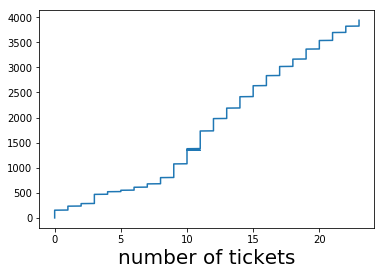

In [95]:
plt.plot(dff.values, dff.index.values)
plt.xlabel('number of tickets', fontsize=20);
# want to change the axis around

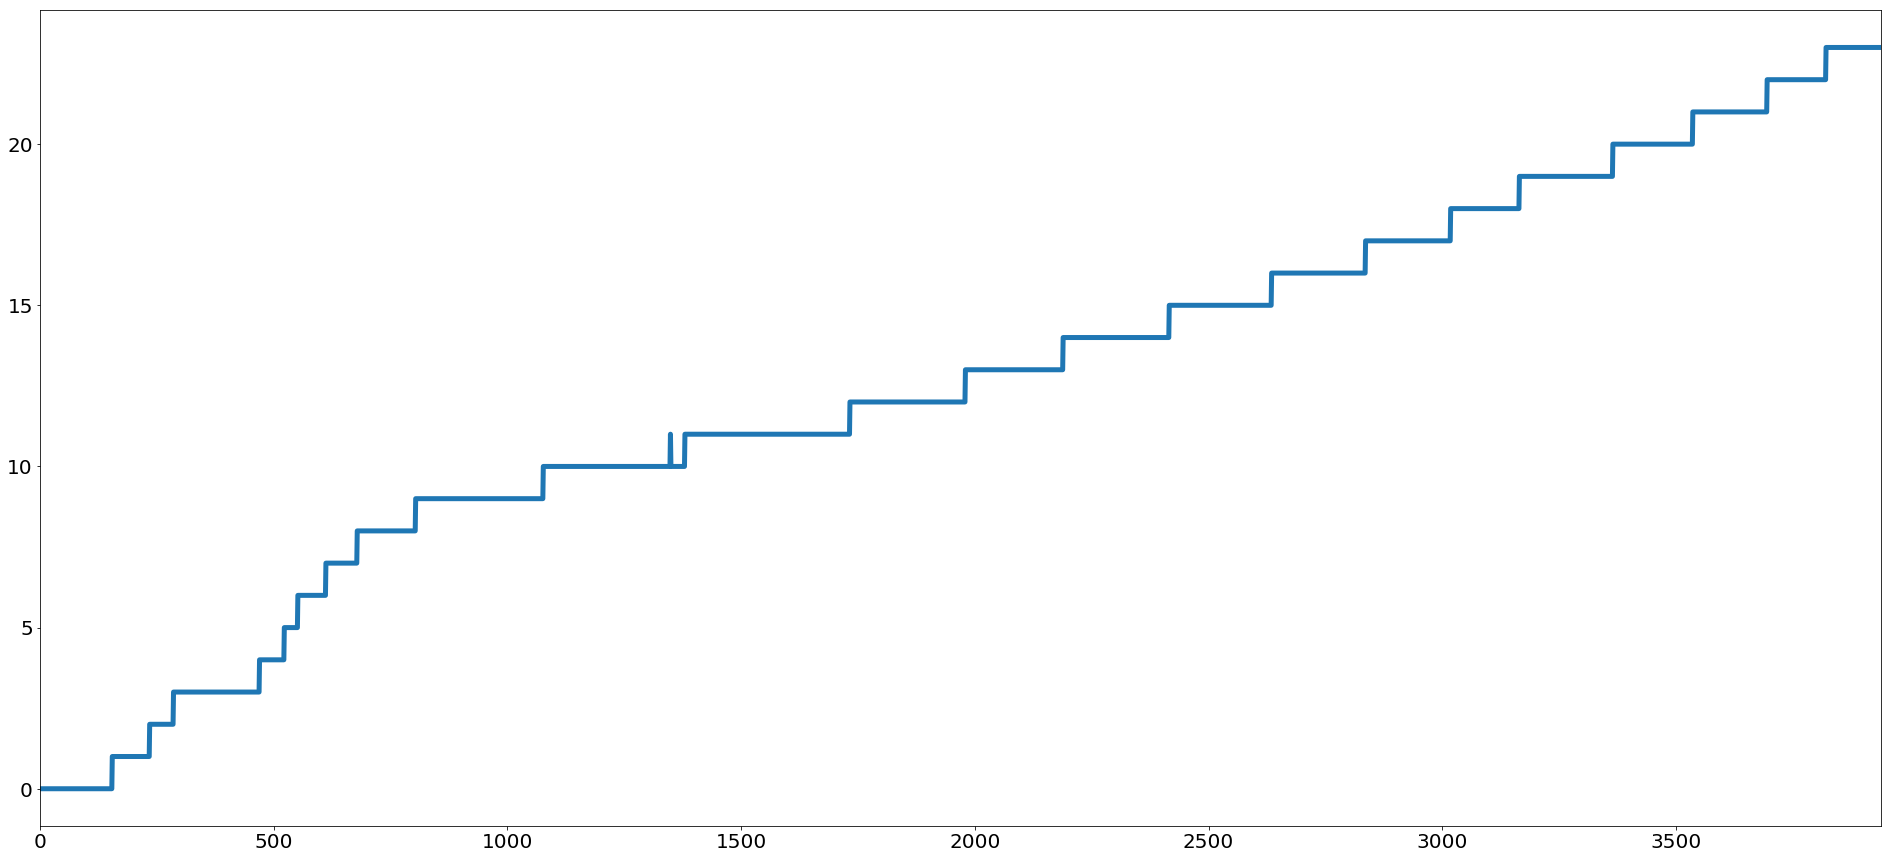

In [97]:
dff.T.plot(figsize=(33,15), linewidth=5, fontsize=20)

In [98]:
single_day.head()

,Unnamed: 0,ticket_number,issue_date,violation_location,license_plate_number,license_plate_state,license_plate_type,zipcode,violation_code,violation_description,unit,unit_description,vehicle_make,fine_level1_amount,fine_level2_amount,current_amount_due,total_payments,ticket_queue,ticket_queue_date,notice_level,hearing_disposition,notice_number,officer,address,latitudes,longitudes,hour,Datetime
0,0,9192680820,2017-12-16 00:00:00,3473 N CLARK,64746252b5c6e9ba5f5aab9e2b3b2b902ec05eec0de158...,IL,PAS,60633.0,0964080B,NO STANDING/PARKING TIME RESTRICTED,502,DOF,NISS,100,200,0.0,100.0,Paid,2018-02-06 00:00:00,DETR,NaN,5207011090,1109,"3400 n clark, chicago, il",41.705378,-87.708747,0,2017-12-16 00:00:00
1,1,68894996,2017-12-16 00:00:00,2410 W CATALPA,afd361aee0cad191ecb238a7abebd592f8cdabf87196dc...,IL,PAS,60625.0,0964125B,"NO CITY STICKER VEHICLE UNDER/EQUAL TO 16,000 ...",20,CPD,NISS,200,400,0.0,200.0,Paid,2018-01-26 00:00:00,VIOL,NaN,5210312890,9014,"2400 w catalpa, chicago, il",41.886065,-87.620610,0,2017-12-16 00:00:00
2,2,9192716841,2017-12-16 00:00:00,23 W HUBBARD ST,f289d12483fab8c2390391f66c263ff955ddc460e265bf...,IL,PAS,607071735.0,0964080B,NO STANDING/PARKING TIME RESTRICTED,502,DOF,HOND,100,200,200.0,0.0,Notice,2017-12-21 00:00:00,FINL,NaN,5208926530,1627,"1 w hubbard st, chicago, il",41.906313,-87.733800,0,2017-12-16 00:00:00
3,3,68747771,2017-12-16 00:01:00,3616 E 107TH ST,95d5f5a9e311b5635ce06a4c1af0f444bd513474c180c5...,IL,PAS,606176701.0,0964150B,PARKING/STANDING PROHIBITED ANYTIME,4,CPD,GMC,75,150,0.0,75.0,Paid,2018-01-06 00:00:00,VIOL,NaN,5177215050,17916,"3600 e 107th st, chicago, il",41.773274,-87.666534,0,2017-12-16 00:01:00
4,4,68683501,2017-12-16 00:01:00,8435 S DREXEL,5370eff877e020a28790b771d51776db00e117cbbdad9e...,IL,PAS,604151666.0,0976160B,EXPIRED PLATE OR TEMPORARY REGISTRATION,6,CPD,NISS,60,120,146.4,0.0,Notice,2017-12-28 00:00:00,SEIZ,NaN,5190742630,15972,"8400 s drexel, chicago, il",41.886065,-87.620610,0,2017-12-16 00:01:00


Text(0.5, 0, 'time of day')

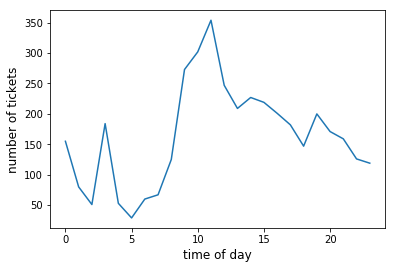

In [99]:
#group by hour 
yello = single_day.hour.value_counts().sort_index()

plt.plot(yello.index.values, yello.values)

plt.ylabel('number of tickets', fontsize=12)
plt.xlabel('time of day', fontsize=12)
# want to change the axis around

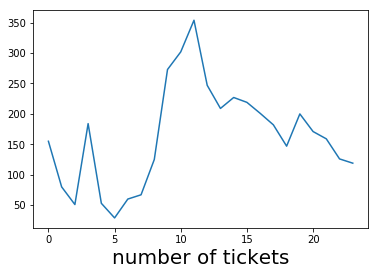

In [100]:
#group by hour 
x = single_day.hour.value_counts().sort_index()

plt.plot(x.index.values, x.values)
plt.xlabel('number of tickets', fontsize=20);
# want to change the axis around

In [128]:
yzz = december_saturday.hour.value_count().sort_index()

plt.plot(yzz.index.values, yzz.values)
plt.xlabel('number of tickets', fontsize=20);

AttributeError: 'DataFrame' object has no attribute 'hour'

Text(0, 0.5, 'latitudes')

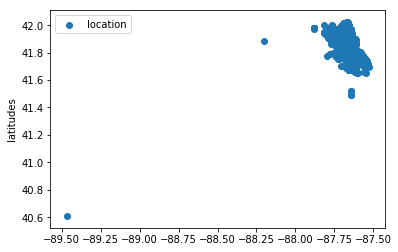

In [114]:
#this data we will see what area the top ticket issuer issued tickets in
feet = single_day.loc[single_day['officer'] == '716']
feet.head(2)

,Unnamed: 0,ticket_number,issue_date,violation_location,license_plate_number,license_plate_state,license_plate_type,zipcode,violation_code,violation_description,unit,unit_description,vehicle_make,fine_level1_amount,fine_level2_amount,current_amount_due,total_payments,ticket_queue,ticket_queue_date,notice_level,hearing_disposition,notice_number,officer,address,latitudes,longitudes,hour,Datetime


In [115]:
#machine learing part of the project
#1. take a day sample (june_friday)
#2. Pull sample for a spefic zip code
#3. perform a value count of each hour of that day
#4. Add up sums for each hour spent in the place
#5. Divide by total number of tickets for that day 


In [116]:
june_friday.head()

,Unnamed: 0,ticket_number,issue_date,violation_location,license_plate_number,license_plate_state,license_plate_type,zipcode,violation_code,violation_description,unit,unit_description,vehicle_make,fine_level1_amount,fine_level2_amount,current_amount_due,total_payments,ticket_queue,ticket_queue_date,notice_level,hearing_disposition,notice_number,officer,address,new_zipcodes,latitudes,longitudes,Datetime,hour
0,0,68139029,2017-06-09 00:00:00,223 E MONTROSE HARBOR,7e264ef5900a5baca9a55f190ae8a669c37ead19aec08f...,IL,PAS,60613.0,0980130B,PARK IN CITY LOT WHEN CLOSED,19,CPD,CADI,50,100,0.0,-50.0,Paid,2018-02-15 00:00:00,DETR,Not Liable,5176346480,18634,"200 e montrose harbor, chicago, il",60640,41.963452,-87.637781,2017-06-09 00:00:00,0.0
1,1,9191901110,2017-06-09 00:00:00,22 E PEARSON ST,bff12d7d0db037418254067b9a257577b656473a6a58f1...,IL,PAS,NaN,0964190B,EXPIRED METER CENTRAL BUSINESS DISTRICT,502,DOF,TOYT,65,130,0.0,65.0,Paid,2017-06-12 00:00:00,NaN,NaN,0,1628,"1 e pearson st, chicago, il",60611,41.897567,-87.627312,2017-06-09 00:00:00,0.0
2,2,9191901954,2017-06-09 00:00:00,2125 W 22ND PL,afc9425fa5804469d3cf060b8f489d002aed6b308dbd89...,IL,PAS,NaN,0964090E,RESIDENTIAL PERMIT PARKING,502,DOF,DODG,75,150,0.0,0.0,Dismissed,2017-09-03 00:00:00,NaN,NaN,0,830,"2100 w 22nd pl, chicago, il",60608,41.851134,-87.679227,2017-06-09 00:00:00,0.0
3,3,68160524,2017-06-09 00:00:00,5023 S COLUMBUS DR,37aa6f1fd35f28be8a17b684b63490987aa861c01e8784...,IL,PAS,NaN,0964080B,NO STANDING/PARKING TIME RESTRICTED,1,CPD,CHEV,100,200,100.0,0.0,Define,2017-06-19 00:00:00,NaN,NaN,0,11206,"5000 s columbus dr, chicago, il",60605,41.869412,-87.620526,2017-06-09 00:00:00,0.0
4,4,9191901955,2017-06-09 00:02:00,2129 W 22ND PL,bd2f65e38a42048c487d87d4a125c4bbff552737420b35...,IL,PAS,606084117.0,0964090E,RESIDENTIAL PERMIT PARKING,502,DOF,FORD,75,150,0.0,75.0,Paid,2017-07-06 00:00:00,VIOL,NaN,5187271780,830,"2100 w 22nd pl, chicago, il",60608,41.851132,-87.679375,2017-06-09 00:02:00,0.0


In [ ]:
zip_break_down = list,june_friday['new_zipcodes'].value_counts().keys().tolist()
counters = june_friday['new_zipcodes'].value_counts().tolist()
print(june_friday['new_zipcodes'].value_counts().head())

# Naive Based Part of the Project

In [39]:
# this cell and below is focused on figuring out the machine learning part of the project

In [105]:
#finds all tickets issued in zipcode 60657
test = june_friday[(june_friday ['new_zipcodes'] == 60657)]

In [106]:
test.shape

(449, 29)

In [107]:
#finds all tickets between 6 pm and midnight
my_mask = test[(test ['hour'] >= 18 ) & (test['hour'] < 24)]

In [108]:
morning = test[(test ['hour'] >= 0 ) & (test['hour'] < 6)]

In [109]:
my_mask.head()

,Unnamed: 0,ticket_number,issue_date,violation_location,license_plate_number,license_plate_state,license_plate_type,zipcode,violation_code,violation_description,unit,unit_description,vehicle_make,fine_level1_amount,fine_level2_amount,current_amount_due,total_payments,ticket_queue,ticket_queue_date,notice_level,hearing_disposition,notice_number,officer,address,new_zipcodes,latitudes,longitudes,Datetime,hour
3042,3042,9191809532,2017-06-09 10:24:00,1115 W SCHOOL,0f9b589b9d58f57186e1b524ce5d28e073b716a87be237...,MI,PAS,48085.0,0964040B,STREET CLEANING,498,DOF,JEEP,60,120,0.0,60.0,Paid,2017-06-14 00:00:00,NaN,NaN,0,720,"1100 w school, chicago, il",60657,41.941618,-87.657022,2017-06-09 10:24:00,18.0
3051,3051,9191796123,2017-06-09 10:25:00,1410 W BELMONT AVE,47c15103c1d0a1463684386352ba021cb18735036dead5...,IL,PAS,606572042.0,0964190A,EXP. METER NON-CENTRAL BUSINESS DISTRICT,729,Miscellaneous,CHEV,50,100,0.0,50.0,Paid,2017-06-21 00:00:00,VIOL,NaN,5190059220,1441,"1400 w belmont ave, chicago, il",60657,41.939746,-87.664311,2017-06-09 10:25:00,18.0
3078,3078,9191880389,2017-06-09 10:26:00,1115 W SCHOOL,7723e601f1ba1543ae02bda5fee30c9212f5cb6ba8803a...,IL,PAS,605656361.0,0964040B,STREET CLEANING,498,DOF,MAZD,60,120,0.0,60.0,Paid,2017-07-04 00:00:00,VIOL,NaN,5195845020,114,"1100 w school, chicago, il",60657,41.941618,-87.657022,2017-06-09 10:26:00,18.0
3085,3085,9191809533,2017-06-09 10:27:00,3256 N CLIFTON AVE,2239951e456876338083b0676ad9760756be1522bae289...,IL,PAS,604662125.0,0964040B,STREET CLEANING,498,DOF,ISU,60,120,0.0,60.0,Paid,2017-07-07 00:00:00,VIOL,NaN,5195037200,720,"3200 n clifton ave, chicago, il",60657,41.941484,-87.657819,2017-06-09 10:27:00,18.0
3103,3103,9191809534,2017-06-09 10:28:00,3254 N CLIFTON AVE,b771b14336425a4988862b823265da4138dead39671f5c...,IA,PAS,502652963.0,0964040B,STREET CLEANING,498,DOF,TOYT,60,120,0.0,60.0,Paid,2017-06-18 00:00:00,NaN,NaN,0,720,"3200 n clifton ave, chicago, il",60657,41.941205,-87.657797,2017-06-09 10:28:00,18.0


In [110]:
morning.head()

,Unnamed: 0,ticket_number,issue_date,violation_location,license_plate_number,license_plate_state,license_plate_type,zipcode,violation_code,violation_description,unit,unit_description,vehicle_make,fine_level1_amount,fine_level2_amount,current_amount_due,total_payments,ticket_queue,ticket_queue_date,notice_level,hearing_disposition,notice_number,officer,address,new_zipcodes,latitudes,longitudes,Datetime,hour
19,19,68140749,2017-06-09 00:06:00,3240 N HALSTED,ede5298c71d7d7e5edf924e09116b964a222eed8009786...,IL,PAS,NaN,0964080B,NO STANDING/PARKING TIME RESTRICTED,19,CPD,HYUN,100,200,0.0,100.0,Paid,2017-06-13 00:00:00,NaN,NaN,0,6648,"3200 n halsted, chicago, il",60657,41.941304,-87.649339,2017-06-09 00:06:00,0.0
20,20,68140751,2017-06-09 00:07:00,3232 N HALSTED,098e35506aa3a6be096b41e3adf9f39cbc975dbabb9af7...,IL,PAS,60618.0,0964080B,NO STANDING/PARKING TIME RESTRICTED,19,CPD,HOND,100,200,0.0,100.0,Paid,2017-06-16 00:00:00,NaN,NaN,5187045070,6648,"3200 n halsted, chicago, il",60657,41.940765,-87.649331,2017-06-09 00:07:00,0.0
29,29,68140753,2017-06-09 00:10:00,3228 N HALSTED,8986a17488b30e8c0d2b1993840882d974e314d6792dcf...,IL,PAS,602021899.0,0964080B,NO STANDING/PARKING TIME RESTRICTED,19,CPD,BUIC,100,200,244.0,0.0,Notice,2017-06-15 00:00:00,SEIZ,NaN,5020736820,6648,"3200 n halsted, chicago, il",60657,41.940764,-87.649331,2017-06-09 00:10:00,0.0
363,363,68128499,2017-06-09 03:00:00,3451 N LAKE SHORE DR,83f4010b5e01fa6541855a01593c716a22b27cad9b658b...,IN,PAS,479092976.0,0912060,"STAND, PARK, OR OTHER USE OF BUS LANE",145,CPD-Other,TOYT,90,180,0.0,90.0,Paid,2017-08-14 00:00:00,DETR,NaN,5195998290,6415,"3400 n lake shore dr, chicago, il",60657,41.944924,-87.641270,2017-06-09 03:00:00,3.0


In [46]:
test.shape

(449, 29)

In [47]:
morning.shape

(4, 29)

In [48]:
my_mask.shape

(21, 29)

In [49]:
#number of tickets issued in 60657 on June 9th
test.shape

(449, 29)

In [50]:
test.head()



,Unnamed: 0,ticket_number,issue_date,violation_location,license_plate_number,license_plate_state,license_plate_type,zipcode,violation_code,violation_description,unit,unit_description,vehicle_make,fine_level1_amount,fine_level2_amount,current_amount_due,total_payments,ticket_queue,ticket_queue_date,notice_level,hearing_disposition,notice_number,officer,address,new_zipcodes,latitudes,longitudes,Datetime,hour
19,19,68140749,2017-06-09 00:06:00,3240 N HALSTED,ede5298c71d7d7e5edf924e09116b964a222eed8009786...,IL,PAS,NaN,0964080B,NO STANDING/PARKING TIME RESTRICTED,19,CPD,HYUN,100,200,0.0,100.0,Paid,2017-06-13 00:00:00,NaN,NaN,0,6648,"3200 n halsted, chicago, il",60657,41.941304,-87.649339,2017-06-09 00:06:00,0.0
20,20,68140751,2017-06-09 00:07:00,3232 N HALSTED,098e35506aa3a6be096b41e3adf9f39cbc975dbabb9af7...,IL,PAS,60618.0,0964080B,NO STANDING/PARKING TIME RESTRICTED,19,CPD,HOND,100,200,0.0,100.0,Paid,2017-06-16 00:00:00,NaN,NaN,5187045070,6648,"3200 n halsted, chicago, il",60657,41.940765,-87.649331,2017-06-09 00:07:00,0.0
29,29,68140753,2017-06-09 00:10:00,3228 N HALSTED,8986a17488b30e8c0d2b1993840882d974e314d6792dcf...,IL,PAS,602021899.0,0964080B,NO STANDING/PARKING TIME RESTRICTED,19,CPD,BUIC,100,200,244.0,0.0,Notice,2017-06-15 00:00:00,SEIZ,NaN,5020736820,6648,"3200 n halsted, chicago, il",60657,41.940764,-87.649331,2017-06-09 00:10:00,0.0
363,363,68128499,2017-06-09 03:00:00,3451 N LAKE SHORE DR,83f4010b5e01fa6541855a01593c716a22b27cad9b658b...,IN,PAS,479092976.0,0912060,"STAND, PARK, OR OTHER USE OF BUS LANE",145,CPD-Other,TOYT,90,180,0.0,90.0,Paid,2017-08-14 00:00:00,DETR,NaN,5195998290,6415,"3400 n lake shore dr, chicago, il",60657,41.944924,-87.641270,2017-06-09 03:00:00,3.0
730,730,67884875,2017-06-09 07:29:00,450 W BRIAR,aca7edf1d13d92715dfb5a4d4df675deec44aa972df687...,IL,PAS,606135873.0,0964100C,BLOCK ACCESS/ALLEY/DRIVEWAY/FIRELANE,19,CPD,VOLK,150,300,0.0,0.0,Dismissed,2017-10-30 00:00:00,VIOL,Not Liable,5196686600,18773,"400 w briar, chicago, il",60657,41.938730,-87.641473,2017-06-09 07:29:00,8.0


Text(0, 0.5, 'latitudes')

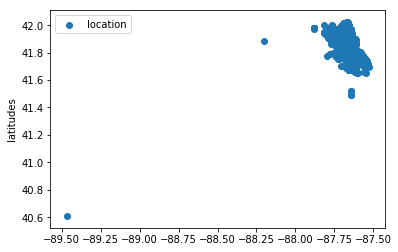

In [103]:
#mapped latitudes vs longitudes 

plt.scatter(single_day.longitudes, single_day.latitudes, label='location')
plt.legend(loc='upper left')
plt.ylabel('latitudes')


In [104]:
june_friday.shape

(8052, 29)

In [ ]:
#will not create an unnamed column each time.

#single_day.to_csv('appended_zipcode.csv',index=False)

In [ ]:
#appends 'zipcode_new column to dataframe'
#single_day['zipcode_new'] = pd.Series(zip_codes)
single_day.head(1)

In [ ]:
#this block found zip codes for the 
#zip_codes = []
#count = 1
#for address in single_day['violation_location']:
    #if count == 2 :
        #break
    #ticket_address = '{}, Chicago, IL'.format(address)
    #geolocator = ArcGIS()
    #location = geolocator.geocode(ticket_address, timeout=1000)
    location = geolocator.reverse(location[1], timeout=1000)
    #print (location)
    try:
        zipcode = int(location[0].split()[-1].rstrip(','))
    except:
        location = geolocator.reverse(location[1], timeout=1000)
        zipcode = int(location[0].split()[-2].rstrip(','))
    zip_codes.append(zipcode)
    count +=1

In [ ]:


#this block still works. Feel free to refernce it later if other block breaks
#this shows top 20 zip codes of residents who recieved parking tickets
#uniqueZip = parking_data['zipcode'].value_counts().keys().tolist()
#counts = parking_data['zipcode'].value_counts().tolist()
#print(parking_data['zipcode'].value_counts().head())

In [ ]:
# Do not run this cell
def get_zipcode(row):
    #address = '{}, Chicago, IL'.format(row['violation_location'])

    geolocator = ArcGIS()
   # location = geolocator.geocode(address, timeout=1000)
    time.sleep(5)
    try:
        zipcode = int(location[0].split()[-1].rstrip(','))
    except:
        location = geolocator.reverse(location[1], timeout=1000)
        zipcode = int(location[0].split()[-2].rstrip(','))

    return zipcode
for i in range(0,1):

    print(single_day.iloc[i]['ticket_number'])
    tn = single_day.iloc[i]['ticket_number']
    result = get_zipcode(single_day.iloc[i])
    print(result)
    single_day.at[tn,'new_zipcode'] = result

#     single_day.iloc[i]['new_zipcode'] = single_day.iloc[i].apply(get_zipcode, axis=1)

#     single_day.iloc[i] = single_day.iloc[i].drop(['Unnamed: 0', 'zipcode'], axis=1)

#     single_day.iloc[i].columns.values[-1] = 'zipcode'
#     single_day.iloc[i].head()

